# Part I - FORD GoBike System Data Exploration
## by Aderinsola Kola-Adepoyigi

# TABLE OF CONTENT<a id="toc"></a>

- [Introduction](#intro)


- [Preliminary Wrangling](#premwrang)
    - [Data Dictionary](#datadict)
    - [Assessing the Data](#assess)
    - [Cleaning the Data](#clean)
    - [Wrangling Conclusion](#wrancon) 


- [Univariate Exploration](#univex)
    - [Numerical Features](#univex_numvar)
    - [Categorical Features](#catfeat)
    - [Univariate Exploration Conclusions](#univex_conclusion)


- [Bivariate Exploration](#bivex)
    - [Numerical Features](#bivex_numfeat)
    - [Numerical and Categorical Features](#bivex_numcatfeat)
    - [Categorical Features](#bivex_catfeat)
    - [Bivariate Exploration Conclusions](#bivex_conclusion)


- [Multivariate Exploration](#multivex)
    - [Multivariate Exploration Conclusion](#multivex_conclusion)
    
    
- [Conclusions](#final_conclusions)


- [References](#ref)
    

## [Introduction](#toc) <a id="intro"></a>
    
>  This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
## set max number of columns to see
# pd.options.display.max_columns = None
# set max number of rows to see
pd.set_option('display.max_rows', 500)

## [Preliminary Wrangling](#toc) <a id="premwrang"></a>                                                                                  


In [3]:
# create df by loading in csv file.
raw_df = pd.read_csv('201902-fordgobike-tripdata.csv')

### [Data Dictionary](#toc) <a id="datadict"></a>
- duration_sec - length of trip in seconds <br>
- start_time - start time and date of trip<br>
- end_time - end time and date of trip<br>
- start_station_id - start location station id of trip<br>
- start_station_name - start location station name<br>
- start_station_latitude - start location station id latitude<br>
- start_station_longitude - start location station id of longitude<br>
- end_station_id - end location station id of trip <br>
- end_station_name - end location station name <br>
- end_station_latitude - end location station id latitude<br>
- end_station_longitude - end location station id of longitude<br>
- bike_id - bike trip id<br>
- user_type - user type<br>
- member_birth_year - birth year of member taking the trip<br>
- member_gender - gender of member taking the trip<br>
- bike_share_for_all_trip - allow bike share for all trips<br>

## [Assessing the Data](#toc) <a id="assess"></a>

In [4]:
raw_df.sample(10,random_state=22)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
164523,480,2019-02-05 08:22:42.4420,2019-02-05 08:30:42.6900,246.0,Berkeley Civic Center,37.869060,-122.270556,268.0,Ellsworth St at Russell St,37.857490,-122.261578,4596,Subscriber,1991.0,Female,No
120830,160,2019-02-11 16:40:38.3930,2019-02-11 16:43:18.8780,77.0,11th St at Natoma St,37.773507,-122.416040,78.0,Folsom St at 9th St,37.773717,-122.411647,2299,Subscriber,1971.0,Male,No
72816,452,2019-02-19 15:37:48.6870,2019-02-19 15:45:21.6550,50.0,2nd St at Townsend St,37.780526,-122.390288,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,6500,Subscriber,1970.0,Male,No
147365,195,2019-02-07 07:59:58.4700,2019-02-07 08:03:13.7360,373.0,Potrero del Sol Park (25th St at Utah St),37.751792,-122.405216,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,4383,Subscriber,1992.0,Male,No
120827,384,2019-02-11 16:37:06.6340,2019-02-11 16:43:31.2930,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,22.0,Howard St at Beale St,37.789756,-122.394643,2101,Subscriber,1981.0,Male,No
148018,155,2019-02-07 06:21:43.2980,2019-02-07 06:24:19.0670,327.0,5th St at San Salvador St,37.332039,-121.881766,310.0,San Fernando St at 4th St,37.335885,-121.885660,324,Subscriber,1994.0,Male,Yes
95649,632,2019-02-15 13:02:46.2090,2019-02-15 13:13:18.9910,77.0,11th St at Natoma St,37.773507,-122.416040,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1453,Subscriber,1984.0,Male,No
165920,483,2019-02-04 21:10:42.9690,2019-02-04 21:18:45.9760,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,251.0,California St at University Ave,37.870555,-122.279720,2591,Customer,1983.0,Male,No
138219,393,2019-02-08 07:53:01.5010,2019-02-08 07:59:34.6110,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,22.0,Howard St at Beale St,37.789756,-122.394643,3643,Subscriber,1978.0,Male,No
15123,636,2019-02-27 09:55:27.7720,2019-02-27 10:06:04.5070,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,5969,Subscriber,1972.0,Male,No


In [5]:
raw_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


###### Observation
> The duration column section has a 75th percentile of 796 seconds and a maximum of 85444 seconds, suggesting outliers.

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
print(raw_df.shape)

(183412, 16)


In [8]:
print(raw_df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [9]:
raw_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

###### Observation

- id columns need to be changed to string even though they are numbers. 
- Missing values in some columns.
- time columns need to be changed to datetime type. <br>
- I will also extract months and days from them for more insights. <br>
- I will drop the long and lat columns as I do not have any use for them.
- `member_birth_year` gonna be changed to int for easier analysis. <br>
- get the displacement of trip from start and end long and lat


The cell below helps us do a quick visual assessment through the unique values in the columns

In [10]:
for i in raw_df.columns:           # looping through the column names in current df
    print(i)                               # print the column name then
    print(raw_df[i].unique())      # print the unique values in each column and
    print("\n\n")  

duration_sec
[52185 42521 61854 ... 13251  5713  2822]



start_time
['2019-02-28 17:32:10.1450' '2019-02-28 18:53:21.7890'
 '2019-02-28 12:13:13.2180' ... '2019-02-01 00:06:05.5490'
 '2019-02-01 00:05:34.3600' '2019-02-01 00:00:20.6360']



end_time
['2019-03-01 08:01:55.9750' '2019-03-01 06:42:03.0560'
 '2019-03-01 05:24:08.1460' ... '2019-02-01 00:08:27.2200'
 '2019-02-01 00:07:54.2870' '2019-02-01 00:04:52.0580']



start_station_id
[ 21.  23.  86. 375.   7.  93. 300.  10.  19. 370.  44. 127. 252. 243.
 349. 131.  74. 321. 180.  72. 163. 190.   6.  78. 258. 238.  28. 109.
  98. 133. 113. 220. 122.  58.  87.  15. 104.  27.   9. 140. 310.  53.
 106. 340. 121.  11. 240.  61.  36.  34.  13. 345.  43. 239. 182. 119.
 369. 159. 254.  30. 356. 324.  71.  67. 250. 245. 377. 317. 219. 274.
  77. 129. 253. 386.  95. 183.   5. 137.  73. 176. 197. 136.  33.  59.
 115. 280. 262. 368. 385.  90. 112. 160.   4. 247.  97. 308.  75. 123.
 172. 114. 244.   8.  55.  31.  62. 125.  49. 194. 263. 120. 3

['Customer' 'Subscriber']



member_birth_year
[1984.   nan 1972. 1989. 1974. 1959. 1983. 1988. 1992. 1996. 1993. 1990.
 1981. 1975. 1978. 1991. 1997. 1986. 2000. 1982. 1995. 1980. 1973. 1985.
 1971. 1979. 1967. 1998. 1994. 1977. 1999. 1987. 1969. 1963. 1976. 1964.
 1965. 1961. 1968. 1966. 1962. 1954. 1958. 1960. 1970. 1956. 1957. 1945.
 1900. 1952. 1948. 1951. 1941. 1950. 1949. 1953. 1955. 1946. 1947. 1931.
 1943. 1942. 1920. 1933. 2001. 1878. 1901. 1944. 1928. 1934. 1939. 1930.
 1902. 1910. 1938. 1927.]



member_gender
['Male' nan 'Other' 'Female']



bike_share_for_all_trip
['No' 'Yes']





## [Clean](#toc) <a id="clean"></a>

###### TO DO
Create copy of df to perform quick cleaning on.

In [11]:
assess_ford_gobike = raw_df.copy()

###### Define

A good way to start is to take care of missing values.

In [12]:
assess_ford_gobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

###### Code

In [13]:
# I'm just gonna drop them
# It'll cost me about 5% of the data
# I can live with that

assess_ford_gobike.dropna(axis=0,inplace=True)

###### Check

In [14]:
assess_ford_gobike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [15]:
assess_ford_gobike.shape

(174952, 16)

#### Define
Change dtypes of id columns, time columns and member_birth_year column.

###### Code

First id columns

In [16]:
# get all id columns
id_columns = []
for i in assess_ford_gobike.columns: #loop through column names
    if str(i).endswith("id")==True: #select id columns
         id_columns.append(i)
            
id_columns

['start_station_id', 'end_station_id', 'bike_id']

In [17]:
#  use a for loop to go through columns in id_columns list
for column_name in id_columns:
    print(column_name," ", assess_ford_gobike[column_name].dtype) #check current dtype
    assess_ford_gobike[column_name] = assess_ford_gobike[column_name].astype(int).astype("str")#astype("int") to get rid of .0
    print(column_name, " ", assess_ford_gobike[column_name].dtype)#check current dtype
    print("\n")
    

start_station_id   float64
start_station_id   object


end_station_id   float64
end_station_id   object


bike_id   int64
bike_id   object




Next I do the time columns

In [18]:
assess_ford_gobike["start_time"] = pd.to_datetime(assess_ford_gobike["start_time"])
assess_ford_gobike["end_time"] = pd.to_datetime(assess_ford_gobike["end_time"])

lastly for this part the `member_birth_year` column

In [19]:
assess_ford_gobike["member_birth_year"] = assess_ford_gobike["member_birth_year"].astype(int)

In [20]:
assess_ford_gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### Define
- Time to extract month, day of the week, hour and just time(hh:mm:ss) from the time columns.
- Also create displacement from long and lat columns 
- Since I have displacement and time let's just get average velocity.

###### Code

In [21]:
# Extract/breakdown time column into relevant bits.
assess_ford_gobike["start_day"] = assess_ford_gobike["start_time"].dt.day_name()
assess_ford_gobike["start_month"] = assess_ford_gobike["start_time"].dt.month_name()
assess_ford_gobike["start_hour"] = assess_ford_gobike["start_time"].dt.strftime("%H")
assess_ford_gobike["start_time_hms"] = assess_ford_gobike["start_time"].dt.time
assess_ford_gobike["start_date"] = assess_ford_gobike["start_time"].dt.date
assess_ford_gobike["end_day"] = assess_ford_gobike["end_time"].dt.day_name()
assess_ford_gobike["end_month"] = assess_ford_gobike["end_time"].dt.month_name()
assess_ford_gobike["end_hour"] = assess_ford_gobike["end_time"].dt.strftime("%H")
assess_ford_gobike["end_time_hms"] = assess_ford_gobike["end_time"].dt.time
assess_ford_gobike["end_date"] = assess_ford_gobike["end_time"].dt.date

In [22]:
assess_ford_gobike.describe(include="all",datetime_is_numeric=True)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_day,start_month,start_hour,start_time_hms,start_date,end_day,end_month,end_hour,end_time_hms,end_date
count,174952.000000,174952,174952,174952,174952,174952.000000,174952.000000,174952,174952,174952.000000,...,174952,174952,174952,174952,174952,174952,174952,174952,174952,174952
unique,NaN,NaN,NaN,329,329,NaN,NaN,329,329,NaN,...,7,1,24,174648,28,7,2,24,174622,29
top,NaN,NaN,NaN,58,Market St at 10th St,NaN,NaN,67,San Francisco Caltrain Station 2 (Townsend St...,NaN,...,Thursday,February,17,09:06:58.005000,2019-02-28,Thursday,February,17,16:43:46.177000,2019-02-28
freq,NaN,NaN,NaN,3649,3649,NaN,NaN,4624,4624,NaN,...,33712,174952,20904,3,9448,33707,174938,20322,2,9450
mean,704.002744,2019-02-15 21:27:05.282492160,2019-02-15 21:38:49.784215040,NaN,NaN,37.771220,-122.351760,NaN,NaN,37.771414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,61.000000,2019-02-01 00:00:20.636000,2019-02-01 00:04:52.058000,NaN,NaN,37.317298,-122.453704,NaN,NaN,37.317298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,323.000000,2019-02-08 08:32:16.954249984,2019-02-08 08:42:33.415500032,NaN,NaN,37.770407,-122.411901,NaN,NaN,37.770407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,510.000000,2019-02-15 22:20:21.685499904,2019-02-15 22:33:41.234500096,NaN,NaN,37.780760,-122.398279,NaN,NaN,37.781010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,789.000000,2019-02-22 11:22:05.289500160,2019-02-22 11:37:06.322249984,NaN,NaN,37.797320,-122.283093,NaN,NaN,37.797673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,84548.000000,2019-02-28 23:59:18.548000,2019-03-01 08:01:55.975000,NaN,NaN,37.880222,-121.874119,NaN,NaN,37.880222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
! pip install h3

In [24]:
import h3

I'll create the displacement column using this code I saw from this [link](https://stackoverflow.com/questions/71648993/calculate-displacement-between-latitude-longitude-columns-for-pandas-data-frame)

In [25]:
assess_ford_gobike['displacement'] = assess_ford_gobike.apply(lambda row: h3.point_dist((row['start_station_latitude'], row['start_station_longitude']),
                                                (row['end_station_latitude'], row['end_station_longitude']),unit="km"), axis=1)

**NB:**

>This isn't the distance, but the shortest distance between the two points, if the trip was via the rout of a straight line which is most likely not the case. However this just gives an idea of how far apart the start_station and end_stations are.

Now I'll do the velocity bit.km/h 

In [26]:
# converting secs to hours
assess_ford_gobike["avg_vel"] = (assess_ford_gobike["displacement"]*3600)/(assess_ford_gobike["duration_sec"])

**NB**
>The values obtained here should be smaller than the usual because of the value of the calculated displacements, if I had the actual distance values, I would have had larger speeds, these just give me an idea of the relative speeds and distances. 

###### Checking if what I have so far makes sense.

In [27]:
assess_ford_gobike[assess_ford_gobike.displacement==assess_ford_gobike.displacement.max()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_hour,start_time_hms,start_date,end_day,end_month,end_hour,end_time_hms,end_date,displacement,avg_vel
112038,6945,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300,Palm St at Willow St,37.317298,...,14,14:28:44.402000,2019-02-12,Tuesday,February,16,16:24:30.158000,2019-02-12,69.469319,36.010014


In [28]:
# I will round up the displacement and avg_vel columns to 1d.p
assess_ford_gobike["displacement"] = assess_ford_gobike["displacement"].round(decimals=1)
assess_ford_gobike["avg_vel"] = assess_ford_gobike["avg_vel"].round(decimals=1)


###### TO DO

>I want to check if start day and end day columns have any difference; trips that on one day and end in a different one. Then do the same for month. This will let me know if I can drop one of the columns, either the start or end if they are the same thing.

###### Code

In [29]:
(assess_ford_gobike.end_day != assess_ford_gobike.start_day).sum()

283

In [30]:
(assess_ford_gobike.end_month != assess_ford_gobike.start_month).sum()

14

###### Observation

>I anticipated the case of different start_day and end_day of a trip. I think for the one of months most likely started on the last day of the month and ended on the first day of the next month. I"ll pull up those 14 records to see.

In [31]:
assess_ford_gobike[(assess_ford_gobike.end_month != assess_ford_gobike.start_month)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_hour,start_time_hms,start_date,end_day,end_month,end_hour,end_time_hms,end_date,displacement,avg_vel
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,17,17:32:10.145000,2019-02-28,Friday,March,08,08:01:55.975000,2019-03-01,0.5,0.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,12,12:13:13.218000,2019-02-28,Friday,March,05,05:24:08.146000,2019-03-01,2.7,0.2
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,17,17:54:26.010000,2019-02-28,Friday,March,04,04:02:36.842000,2019-03-01,0.3,0.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,23,23:54:18.549000,2019-02-28,Friday,March,00,00:20:44.074000,2019-03-01,2.4,5.5
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,23,23:49:58.632000,2019-02-28,Friday,March,00,00:19:51.760000,2019-03-01,3.3,6.7
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,...,23,23:55:35.104000,2019-02-28,Friday,March,00,00:14:42.588000,2019-03-01,2.0,6.4
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,...,23,23:41:06.766000,2019-02-28,Friday,March,00,00:08:02.756000,2019-03-01,4.5,10.1
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,...,23,23:41:48.790000,2019-02-28,Friday,March,00,00:07:59.715000,2019-03-01,4.5,10.4
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,...,23,23:49:47.699000,2019-02-28,Friday,March,00,00:07:17.025000,2019-03-01,3.7,12.6
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370,Jones St at Post St,37.787327,-122.413278,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,23,23:57:57.211000,2019-02-28,Friday,March,00,00:05:35.435000,2019-03-01,1.0,7.7


###### Observation

>Interestingly all happened on the same day. I'll leave the start and end columns since they are not entirely the same.

#### Define
-  I've broken the time columns into bits, so I'll drop the `start_time` and `end_time` columns.
-  I have decided to drop the longitude and latitude columns

In [32]:
assess_ford_gobike.columns # get column names in df

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_day', 'start_month', 'start_hour', 'start_time_hms',
       'start_date', 'end_day', 'end_month', 'end_hour', 'end_time_hms',
       'end_date', 'displacement', 'avg_vel'],
      dtype='object')

In [33]:
# create a list containing columns I want to drop
cols_to_drop = [ 'start_time', 'end_time', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude', 'end_station_longitude']

In [34]:
# drop columns
assess_ford_gobike.drop(cols_to_drop,axis=1,inplace=True)

In [35]:
len(assess_ford_gobike.columns)

22

###### TO DO
>Next, I want to reorder the columns.

In [36]:
cols_reordered = ['displacement','duration_sec', 'avg_vel', 'start_time_hms', 
                  'start_date', 'start_hour', 'start_day', 
                  'start_month', 'end_time_hms', 'end_date', 'end_hour', 'end_day',
                   'end_month' ,'start_station_id', 'start_station_name',
                   'end_station_id', 'end_station_name', 'bike_id', 'user_type',
                   'member_birth_year', 'member_gender', 'bike_share_for_all_trip']

In [37]:
# check that all columns in cols_reordered match columns in actual assess_ford_gobike
(set(assess_ford_gobike.columns))==(set(cols_reordered))

True

Finally check the state of the data to confirm it's ready for analysis.

In [38]:
clean_ford_gobike = assess_ford_gobike[cols_reordered]
clean_ford_gobike.sample(5,random_state=22)

,displacement,duration_sec,avg_vel,start_time_hms,start_date,start_hour,start_day,start_month,end_time_hms,end_date,...,end_month,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
120318,2.5,1327,6.7,16:54:44.209000,2019-02-11,16,Monday,February,17:16:52,2019-02-11,...,February,377,Fell St at Stanyan St,74,Laguna St at Hayes St,4772,Customer,1980,Male,No
144144,1.9,1099,6.3,12:53:39.231000,2019-02-07,12,Thursday,February,13:11:59.035000,2019-02-07,...,February,304,Jackson St at 5th St,313,Almaden Blvd at San Fernando St,4006,Customer,1982,Male,No
92803,3.2,846,13.6,18:15:10.648000,2019-02-15,18,Friday,February,18:29:17.295000,2019-02-15,...,February,30,San Francisco Caltrain (Townsend St at 4th St),139,Garfield Square (25th St at Harrison St),5267,Subscriber,1987,Other,No
126544,0.9,332,9.9,18:28:46.492000,2019-02-10,18,Sunday,February,18:34:18.828000,2019-02-10,...,February,18,Telegraph Ave at Alcatraz Ave,241,Ashby BART Station,2406,Subscriber,1965,Female,No
133872,2.4,734,11.5,18:09:20.403000,2019-02-08,18,Friday,February,18:21:34.888000,2019-02-08,...,February,30,San Francisco Caltrain (Townsend St at 4th St),368,Myrtle St at Polk St,4631,Subscriber,1995,Male,No


In [39]:
clean_ford_gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   displacement             174952 non-null  float64
 1   duration_sec             174952 non-null  int64  
 2   avg_vel                  174952 non-null  float64
 3   start_time_hms           174952 non-null  object 
 4   start_date               174952 non-null  object 
 5   start_hour               174952 non-null  object 
 6   start_day                174952 non-null  object 
 7   start_month              174952 non-null  object 
 8   end_time_hms             174952 non-null  object 
 9   end_date                 174952 non-null  object 
 10  end_hour                 174952 non-null  object 
 11  end_day                  174952 non-null  object 
 12  end_month                174952 non-null  object 
 13  start_station_id         174952 non-null  object 
 14  star

In [40]:
clean_ford_gobike.describe()

,displacement,duration_sec,avg_vel,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,1.688916,704.002744,10.840094,1984.803135
std,1.097768,1642.204905,3.914033,10.118731
min,0.000000,61.000000,0.000000,1878.000000
25%,0.900000,323.000000,8.700000,1980.000000
50%,1.400000,510.000000,11.100000,1987.000000
75%,2.200000,789.000000,13.400000,1992.000000
max,69.500000,84548.000000,36.000000,2001.000000


In [41]:
clean_ford_gobike.to_csv("clean_ford_gobike.csv",index=False)

### Wrangling Conclusion <a id="wrancon"></a>

### What is the structure of your dataset?

> There are currently 174,952 recorded trips in this dataset and 22 columns (including date and time related features, id features and others). I have only 4 numeric features(displacement, duration_sec, avg_vel and member_birth_year) while the rest are categorical features.

### What is/are the main feature(s) of interest in your dataset?

> Mainly curious about the busiest time periods, stations, bike_ids etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end columns of month, date, days, hours

## [Univariate Exploration](#toc) <a id="univex"></a>

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


### [Univariate Exploration of Numerical Features](#toc) <a id="univex_numvar"></a>

###### Question:

>I'd like to start with looking at the numeric variables.  
What are the distributions of the numeric variables?

###### Visualizations

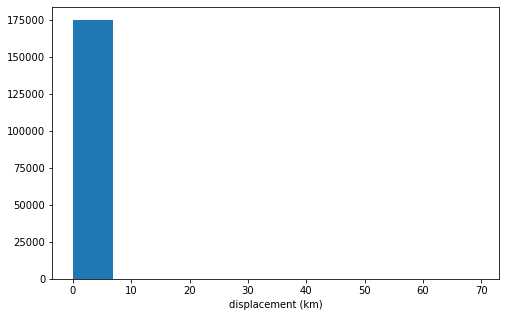

In [42]:
plt.figure(figsize=[8, 5])
plt.hist(data = clean_ford_gobike, x = 'displacement')
plt.xlabel('displacement (km)')
plt.show()

Looks like our previously investigated 69km journey is an outlier.

In [43]:
print(clean_ford_gobike.displacement.describe())
print("\n")
print(clean_ford_gobike.displacement.quantile(.99))

count    174952.000000
mean          1.688916
std           1.097768
min           0.000000
25%           0.900000
50%           1.400000
75%           2.200000
max          69.500000
Name: displacement, dtype: float64


5.1


In [44]:
q99 = clean_ford_gobike.displacement.quantile(.99)

In [45]:
clean_ford_gobike[clean_ford_gobike.displacement > q99]

,displacement,duration_sec,avg_vel,start_time_hms,start_date,start_hour,start_day,start_month,end_time_hms,end_date,...,end_month,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
92,5.7,1940,10.5,22:42:29.789000,2019-02-28,22,Thursday,February,23:14:50.351000,2019-02-28,...,February,377,Fell St at Stanyan St,50,2nd St at Townsend St,4424,Subscriber,1987,Female,No
196,5.7,1520,13.4,22:10:44.680000,2019-02-28,22,Thursday,February,22:36:05.108000,2019-02-28,...,February,377,Fell St at Stanyan St,126,Esprit Park,5229,Subscriber,1987,Male,No
313,8.9,2384,13.5,21:20:32.834000,2019-02-28,21,Thursday,February,22:00:17.064000,2019-02-28,...,February,254,Vine St at Shattuck Ave,339,Jackson St at 11th St,4727,Subscriber,1974,Female,No
511,7.2,7421,3.5,19:16:02.778000,2019-02-28,19,Thursday,February,21:19:44.144000,2019-02-28,...,February,266,Parker St at Fulton St,201,10th St at Fallon St,6001,Subscriber,1975,Male,Yes
577,5.9,1567,13.4,20:41:24.265000,2019-02-28,20,Thursday,February,21:07:31.966000,2019-02-28,...,February,22,Howard St at Beale St,145,29th St at Church St,5945,Subscriber,1987,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182961,5.2,1220,15.4,07:15:28.927000,2019-02-01,07,Friday,February,07:35:49.644000,2019-02-01,...,February,144,Precita Park,23,The Embarcadero at Steuart St,5453,Subscriber,1985,Male,No
183094,5.8,1286,16.3,06:53:43.136000,2019-02-01,06,Friday,February,07:15:09.420000,2019-02-01,...,February,142,Guerrero Park,14,Clay St at Battery St,4733,Subscriber,1993,Male,No
183176,5.3,1175,16.2,06:32:10.210000,2019-02-01,06,Friday,February,06:51:46.022000,2019-02-01,...,February,243,Bancroft Way at College Ave,148,Horton St at 40th St,2828,Subscriber,1991,Male,No
183271,5.4,1308,15.0,05:40:53.003000,2019-02-01,05,Friday,February,06:02:41.923000,2019-02-01,...,February,323,Broadway at Kearny,132,24th St at Chattanooga St,5175,Subscriber,1973,Male,Yes


Ok there are still some reasonable displacements in here... I'll go ahead and query the data for displacements greater than 10.

In [46]:
clean_ford_gobike.query("displacement > 10")

,displacement,duration_sec,avg_vel,start_time_hms,start_date,start_hour,start_day,start_month,end_time_hms,end_date,...,end_month,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
19827,15.7,2229,25.3,15:11:44.523000,2019-02-26,15,Tuesday,February,15:48:54.373000,2019-02-26,...,February,227,Foothill Blvd at Fruitvale Ave,21,Montgomery St BART Station (Market St at 2nd St),2080,Subscriber,1989,Male,Yes
50859,14.1,3225,15.7,17:51:18.986000,2019-02-21,17,Thursday,February,18:45:04.085000,2019-02-21,...,February,167,College Ave at Harwood Ave,22,Howard St at Beale St,4567,Subscriber,1988,Other,Yes
85529,11.7,8957,4.7,12:38:50.477000,2019-02-17,12,Sunday,February,15:08:08.352000,2019-02-17,...,February,163,Lake Merritt BART Station,8,The Embarcadero at Vallejo St,4874,Subscriber,1975,Male,Yes
87602,13.6,4378,11.2,00:27:13.613000,2019-02-17,00,Sunday,February,01:40:11.883000,2019-02-17,...,February,9,Broadway at Battery St,193,Grand Ave at Santa Clara Ave,1975,Customer,1993,Male,No
89787,11.5,1800,23.1,14:15:06.336000,2019-02-16,14,Saturday,February,14:45:06.488000,2019-02-16,...,February,201,10th St at Fallon St,15,San Francisco Ferry Building (Harry Bridges Pl...,6396,Subscriber,1975,Male,Yes
112038,69.5,6945,36.0,14:28:44.402000,2019-02-12,14,Tuesday,February,16:24:30.158000,2019-02-12,...,February,21,Montgomery St BART Station (Market St at 2nd St),300,Palm St at Willow St,4780,Subscriber,1985,Female,No
121514,12.4,1792,24.9,14:39:16.299000,2019-02-11,14,Monday,February,15:09:09.130000,2019-02-11,...,February,230,14th St at Mandela Pkwy,223,16th St Mission BART Station 2,855,Subscriber,1988,Male,No
153112,13.9,2216,22.6,13:05:00.691000,2019-02-06,13,Wednesday,February,13:41:57.678000,2019-02-06,...,February,219,Marston Campbell Park,134,Valencia St at 24th St,3027,Subscriber,1989,Female,Yes
161775,11.5,2357,17.6,13:14:18.246000,2019-02-05,13,Tuesday,February,13:53:35.665000,2019-02-05,...,February,201,10th St at Fallon St,15,San Francisco Ferry Building (Harry Bridges Pl...,4530,Subscriber,1975,Male,Yes


I'll drop just that 112038 index with 69.5, I think it'll make my histogram more pleasant. The remaining values aren't as high, so they shouldn't hurt our data so much. Also I feel like I have cut down a lot of this data previously so I'm trying to be merciful. **(-_-)**

In [47]:
# select the index
# could have just typed in 112038
# This otion helps me practice for situation where I have more indices
idx2drop = clean_ford_gobike.loc[clean_ford_gobike.displacement > 20].index

In [48]:
# drop index
clean_ford_gobike = clean_ford_gobike.drop(idx2drop,axis=0)

In [49]:
# check
clean_ford_gobike.loc[clean_ford_gobike.displacement > 20]

,displacement,duration_sec,avg_vel,start_time_hms,start_date,start_hour,start_day,start_month,end_time_hms,end_date,...,end_month,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


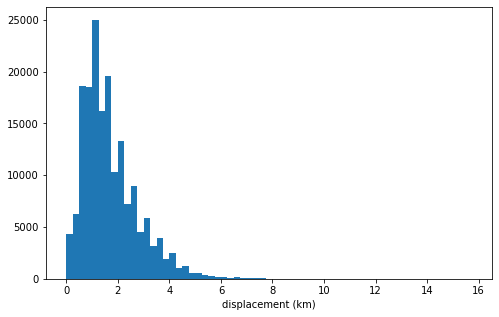

In [50]:
# now let's do that plot again.
binsize = .25
bins = np.arange(0, clean_ford_gobike['displacement'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = clean_ford_gobike, x = 'displacement',bins=bins)
plt.xlabel('displacement (km)')
plt.show()

Observation
>The plot is rightly skewed and unimodal. The displacement between the start and end point of most range from 0-4 km with the peak between 1.0 and 1.25 km.   

Next I look at the duration numeric variable.

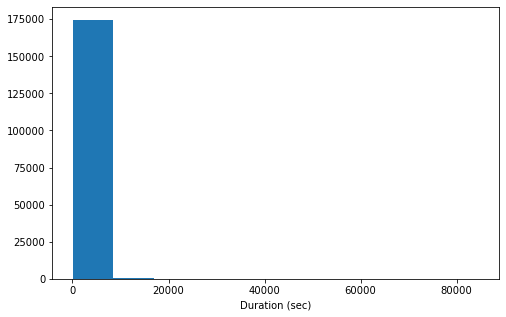

In [51]:
# now let's do that plot again.
plt.figure(figsize=[8, 5])
plt.hist(data = clean_ford_gobike, x = 'duration_sec')
plt.xlabel('Duration (sec)')
plt.show()

Let's repeat the process this time around I'd just drop the max and replot hopefully that solves it.

In [52]:
clean_ford_gobike.query("duration_sec > 20000").duration_sec.mean()

43821.61849710983

In [53]:
duration_under_20k = clean_ford_gobike[clean_ford_gobike.duration_sec<20000]
duration_under_10k = clean_ford_gobike[clean_ford_gobike.duration_sec<10000]
duration_under_6k = clean_ford_gobike[clean_ford_gobike.duration_sec<6000]

In [54]:
duration_under_20k.to_csv("duration_under_20k.csv",index=False)
duration_under_10k.to_csv("duration_under_10k.csv",index=False)
duration_under_6k.to_csv("duration_under_6k.csv",index=False)

Let's make a subplot of all the new copies with the original.

###### Visualization

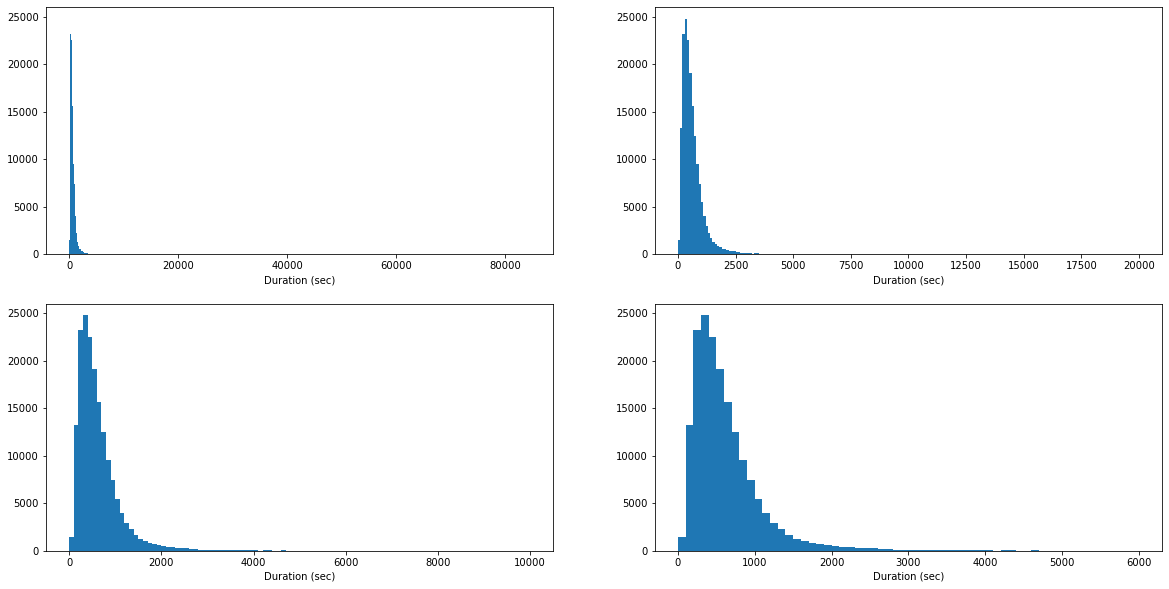

In [55]:
plt.figure(figsize=[20, 10])
binsize = 100

plt.subplot(2,2,1)
bins = np.arange(0, clean_ford_gobike['duration_sec'].max()+binsize, binsize)
plt.hist(data = clean_ford_gobike, x = 'duration_sec',bins=bins)
plt.xlabel('Duration (sec)')


plt.subplot(2,2,2)
bins = np.arange(0, duration_under_20k['duration_sec'].max()+binsize, binsize)
plt.hist(data = duration_under_20k, x = 'duration_sec',bins=bins)
plt.xlabel('Duration (sec)')


plt.subplot(2,2,3)
bins = np.arange(0, duration_under_10k['duration_sec'].max()+binsize, binsize)
plt.hist(data = duration_under_10k, x = 'duration_sec',bins=bins)
plt.xlabel('Duration (sec)')


plt.subplot(2,2,4)
bins = np.arange(0, duration_under_6k['duration_sec'].max()+binsize, binsize)
plt.hist(data = duration_under_6k, x = 'duration_sec',bins=bins)
plt.xlabel('Duration (sec)')

plt.show()

Like the displacement feature, the duration_sec is rightly skewed and unimodal, with it's peak between 300 and 400 seconds. I'll do one more plot with the duration_under_6k df but transforming the seconds to minutes, and scaling the x-axis also. This is to help see the distribution per minute.

In [56]:
def sec2min(x,inverse=False):
    """transform seconds to minutes"""
    if not inverse:
        return x/60
    else:
        return x*60
    

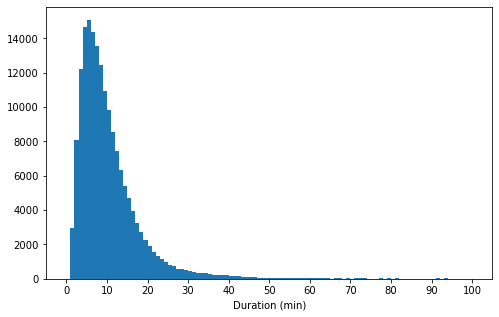

In [57]:
binsize = 1 # for each minute
plt.figure(figsize=(8,5))

bins = np.arange(0, sec2min(duration_under_6k['duration_sec'].max())+binsize, binsize) #apply the transform on bins for x-axis
plt.hist(duration_under_6k["duration_sec"].apply(sec2min),bins=bins) #plotting the scaled duration_sec
tick_locs = np.arange(0,sec2min(duration_under_6k["duration_sec"].max())+10,10) #setting the x-tick locations
# Apply x-ticks
plt.xticks(tick_locs, tick_locs.astype(int))
plt.xlabel('Duration (min)');

###### Observations
>Very little or no trip ended under 1 minute.It's also clearer that the mode duration of trips is between 5 to 6 minutes.

I will move to the average velocity.

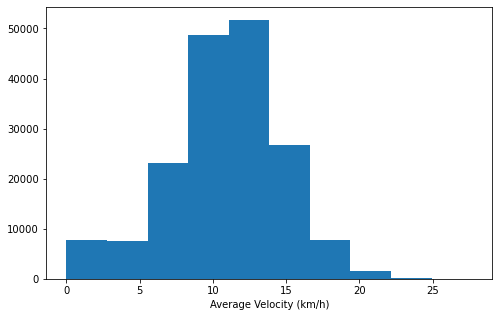

In [58]:
plt.figure(figsize=(8, 5))

plt.hist(data = clean_ford_gobike, x = 'avg_vel')
plt.xlabel('Average Velocity (km/h)')
plt.show()




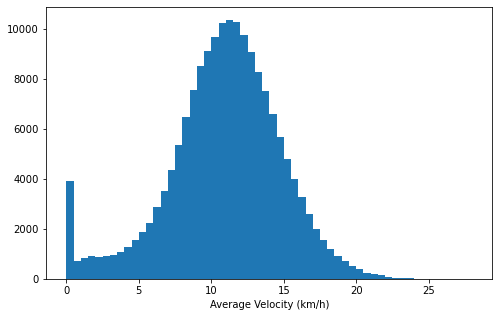

In [59]:
plt.figure(figsize=(8, 5))
binsize = .5
bins = np.arange(0, clean_ford_gobike['avg_vel'].max()+binsize, binsize)
plt.hist(data = clean_ford_gobike, x = 'avg_vel',bins=bins)
plt.xlabel('Average Velocity (km/h)')
plt.show()

###### Observation
> We have a normal distribution. Is this what happens when two rightly skewed features interact? There's also a peak around 0 to 0.5 bin.

### [Univariate Exploration of Categorical Features](#toc) <a id="catfeat"></a>

###### Question
>First I'm interested in seeing the time related plots, busiest days, hours and months.

I'd like to extract the unique values and create an order for all of them.

In [60]:
# first let's check if they are worth extracting
print(clean_ford_gobike["start_month"].unique())
print(clean_ford_gobike["start_hour"].unique())
print(clean_ford_gobike["start_day"].unique())

['February']
['17' '12' '23' '22' '21' '18' '20' '19' '10' '15' '16' '09' '11' '00'
 '13' '14' '08' '07' '05' '06' '04' '03' '02' '01']
['Thursday' 'Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday']


###### Quick Observation!!!
>Just finding out that I have only one month represented in my data. I have to create an order for the day and hour columns to use when plotting.

In [61]:
hour_order = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
              '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'  ]
day_order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

###### Visualization

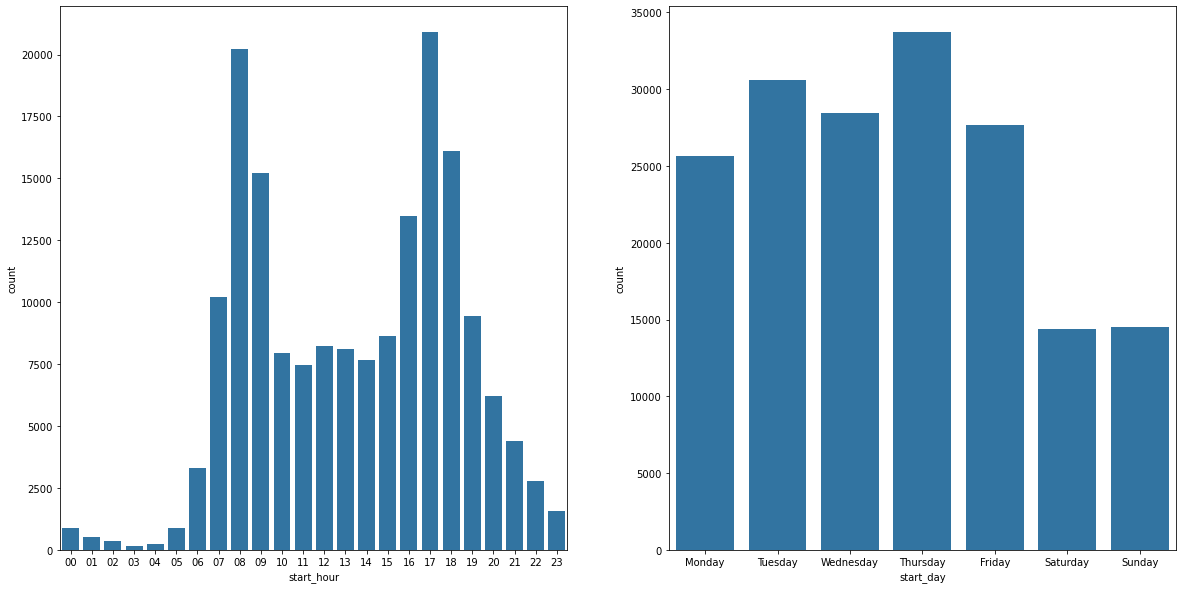

In [62]:
plt.figure(figsize=(20,10))
default_color = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.countplot(data=clean_ford_gobike, x="start_hour",order=hour_order,color=default_color)
("Count of rides per start_hour");

plt.subplot(1,2,2)
sb.countplot(data=clean_ford_gobike,x="start_day",order=day_order,color=default_color)
("Count of rides per start_day");

###### Observation
For the start_hour plot we see that there are two peaks by 08 and 17. I think this represents peolpe who work 9-5 jobs have to start their journey early so they could make it to work by 9am and once they close they leave around 5pm, it's just a theory any other thing could be happening.  
Thursdays were the busiest days in February, Saturdays and Sundays were relatively low compared to other days of the week.

###### Question:
> What were the busiest days(start_date) in the month?

In [63]:
# groupby appointment_day to see number of appointments and their respective dates
rides_per_day = clean_ford_gobike.groupby(["start_date"]).count()['user_type']
rides_per_day

start_date
2019-02-01    5827
2019-02-02    3003
2019-02-03    2709
2019-02-04    5273
2019-02-05    8136
2019-02-06    8655
2019-02-07    8798
2019-02-08    6094
2019-02-09    2549
2019-02-10    3697
2019-02-11    8315
2019-02-12    8154
2019-02-13    3078
2019-02-14    6346
2019-02-15    6977
2019-02-16    3734
2019-02-17    3877
2019-02-18    5296
2019-02-19    9096
2019-02-20    9246
2019-02-21    9120
2019-02-22    8765
2019-02-23    5128
2019-02-24    4229
2019-02-25    6757
2019-02-26    5197
2019-02-27    7447
2019-02-28    9448
Name: user_type, dtype: int64

In [64]:
print(f"The median number of appointments per day is {round(rides_per_day.median())}.")
print(f"The mean number of appointments per day is {round(rides_per_day.mean())}.")
print(f"The date with the most number of appointments, {rides_per_day.max()}, is {(rides_per_day.idxmax())}.")
print(f"The date with the least number of appointments, {rides_per_day.min()}, is {(rides_per_day.idxmin())}.")

The median number of appointments per day is 6220.
The mean number of appointments per day is 6248.
The date with the most number of appointments, 9448, is 2019-02-28.
The date with the least number of appointments, 2549, is 2019-02-09.


###### Visualizations.

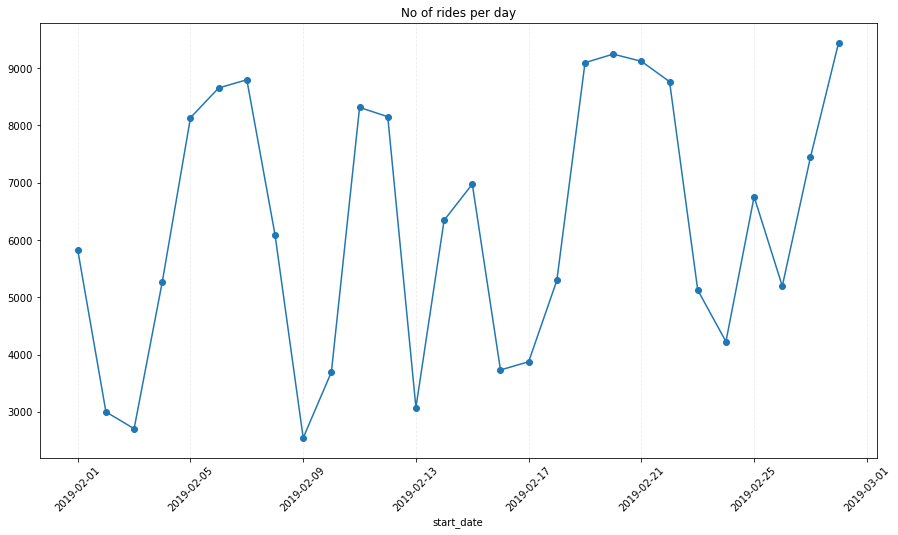

In [65]:
plt.figure(figsize=(15,8))
rides_per_day.plot(marker="o")
plt.grid(linestyle='--', color='grey', axis='x', alpha=.15)
plt.title("No of rides per day")
plt.xticks(rotation = 45);

###### Observation
>I can identify Saturdays and Sundays by looking out for two consecutive low values say about less than 4,000 for the first three weeks and then somewhere around 5,000 and 4,500 for the last. Something striking is the less than 4,000 trips recorded on 13-02-2019 which was a Wednesday: the weekday with the third highes number of trips in February.  Pre-valentine celebrations?  

##### Question
> Next, lets do simple countplots of user_type and member_gender, to know the proportions of the different categories.

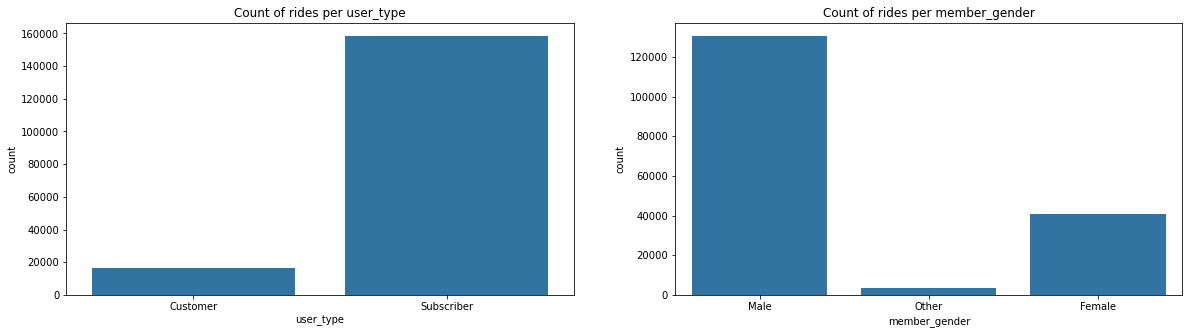

In [66]:
plt.figure(figsize=(20,5))
default_color = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.countplot(data=clean_ford_gobike, x="user_type",color=default_color)
plt.title("Count of rides per user_type");

plt.subplot(1,2,2)
sb.countplot(data=clean_ford_gobike,x="member_gender",color=default_color)
plt.title("Count of rides per member_gender");


In [67]:
# I'll find the percentages
# building a function to help me do that
def prop_plot(x):
    genpercent_count = (clean_ford_gobike[x].value_counts()/clean_ford_gobike[x].count()).round(2)
    ax = genpercent_count.plot(kind='bar', title='Proportion of '+x, color=default_color, alpha=.9);
    ax.bar_label(ax.containers[0])
    plt.xlabel(x, fontsize=18)
    plt.xticks(rotation=30)
    plt.ylabel('Percentage', fontsize=18);


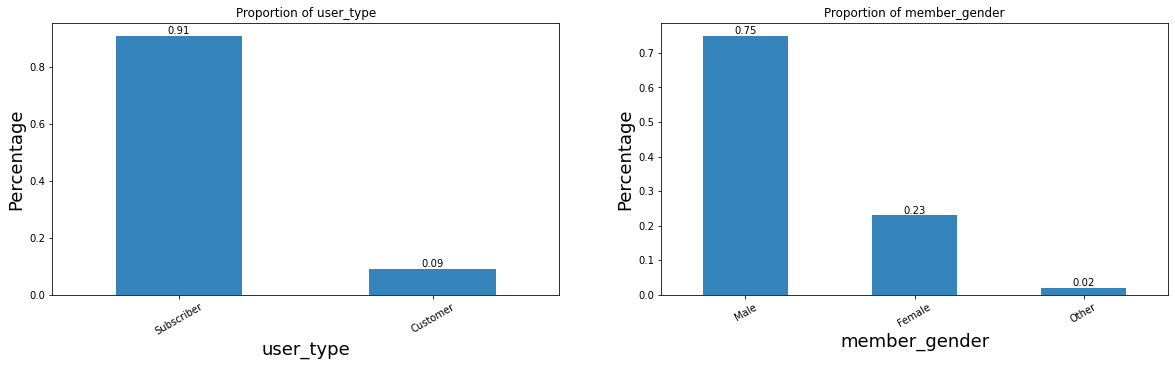

In [68]:
plt.figure(figsize=(20,5))
default_color = sb.color_palette()[0]

plt.subplot(1,2,1)
prop_plot("user_type")

plt.subplot(1,2,2)
prop_plot("member_gender")

For the user type majority of the users are subscribers and majority of the member genders are male.

###### Observation
Lastly, let's get some top 10's. What are the top 10 start stations, end stations and bike_ids?

###### Visualizations

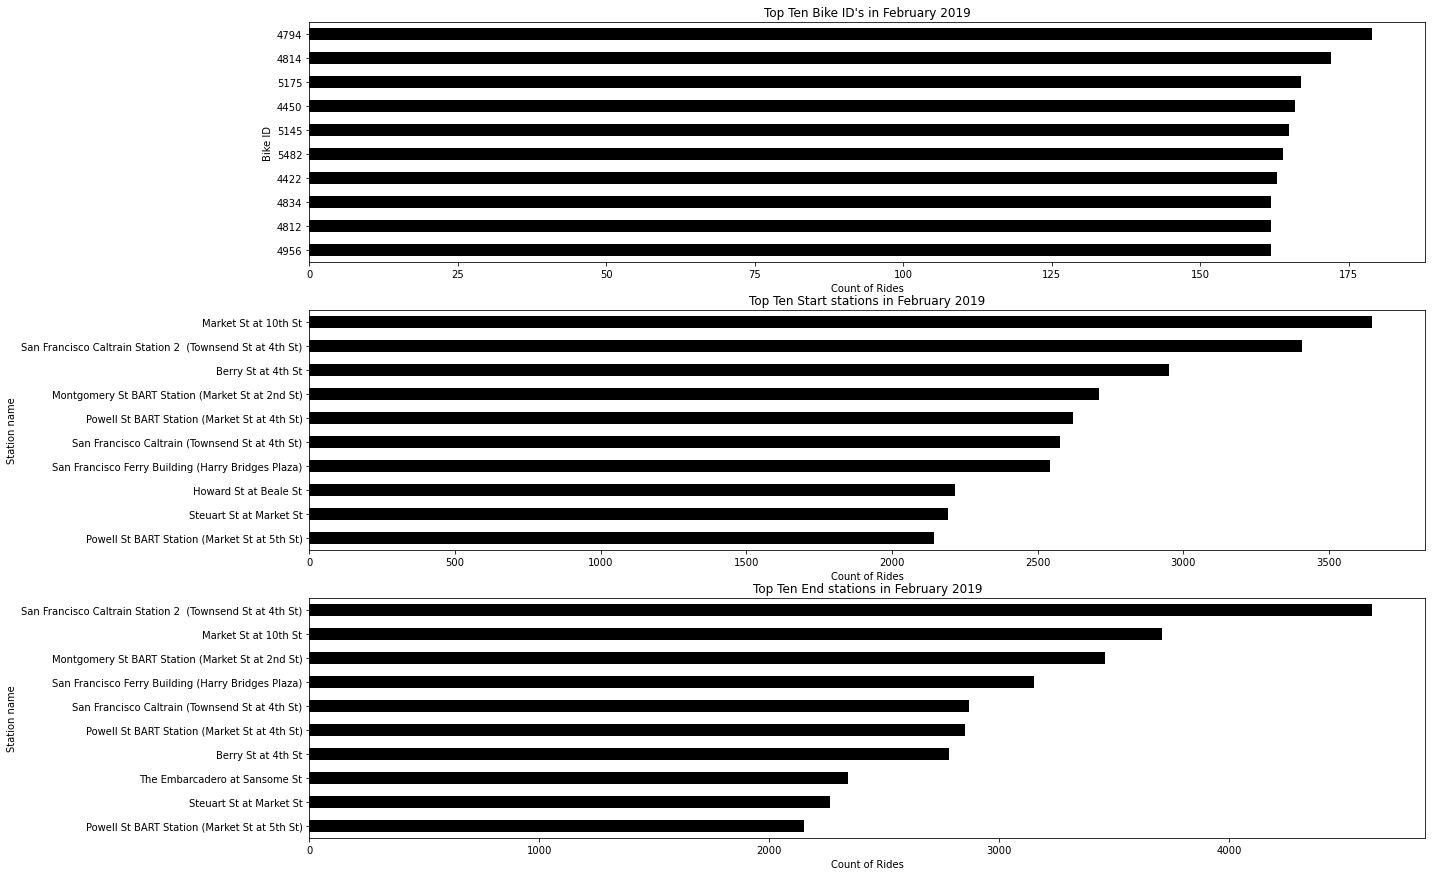

In [69]:

plt.figure(figsize=(20,15))

plt.subplot(3,1,1)
clean_ford_gobike["bike_id"].value_counts()[:10].sort_values().plot(kind="barh",colormap="cubehelix")
plt.title("Top Ten Bike ID's in February 2019")
plt.xlabel("Count of Rides")
plt.ylabel("Bike ID");

plt.subplot(3,1,2)
clean_ford_gobike["start_station_name"].value_counts()[:10].sort_values().plot(kind="barh",colormap="cubehelix")
plt.title("Top Ten Start stations in February 2019")
plt.xlabel("Count of Rides")
plt.ylabel("Station name");

plt.subplot(3,1,3)
clean_ford_gobike["end_station_name"].value_counts()[:10].sort_values().plot(kind="barh",colormap="cubehelix")
plt.title("Top Ten End stations in February 2019")
plt.xlabel("Count of Rides")
plt.ylabel("Station name");
# plt.savefig("tweets_per_weekday.png");

###### Observations
> The top bike ID represented in our dataset is id 4794 with about 180 rides out of 174K+ rides. Considering there are over 4.5k bike id's.  
Majority of the top ten start stations also appear in the top ten end stations.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

<a id="univex_conclusion"></a>
### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable was in seconds so I used a transform to help me better understand the distribution in minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> While I was investigating the `displacement` and duration variables I observed a number of outliers.  
For the displacement I removed the outlier completely from the clean_ford_gobike dataframe.
For the `duration_sec` rather than take them away from the original I decided to create different versions of the dataframes without the outliers.

## [Bivariate Exploration](#toc) <a id="bivex"></a>


Let's make some features ordered category types.

In [70]:
ordinal_var_dict = {'start_hour': ['00', '01', '02', '03', '04', '05', '06', '07', 
                                   '08', '09', '10', '11', '12', '13', '14', '15', 
                                   '16', '17', '18', '19', '20', '21', '22', '23'],
                    'end_hour': ['00', '01', '02', '03', '04', '05', '06', '07', 
                                   '08', '09', '10', '11', '12', '13', '14', '15', 
                                   '16', '17', '18', '19', '20', '21', '22', '23'],
                    'start_day': ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        clean_ford_gobike[var] = clean_ford_gobike[var].astype(ordered_var)
        duration_under_20k[var] = duration_under_20k[var].astype(ordered_var)
        duration_under_10k[var] = duration_under_10k[var].astype(ordered_var)
        duration_under_6k[var] = duration_under_6k[var].astype(ordered_var)
    else: # pre-v0.21
        clean_ford_gobike[var] = clean_ford_gobike[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])
        duration_under_20k[var] = duration_under_20k[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])
        duration_under_10k[var] = duration_under_10k[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])
        duration_under_6k[var] = duration_under_6k[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

### [Bivariate Exploration of Numerical Features](#toc) <a id="bivex_numfeat"></a>

###### Question
>What is the relationship between the numeric values?  
I'd like to do a time vs displacement scatterplot and heatmap plot.

In [71]:
# convert theduration to seconds using the sec2min function created earlier
duration_under_6k["duration_min"] = duration_under_6k["duration_sec"].apply(sec2min)

###### Visualizations

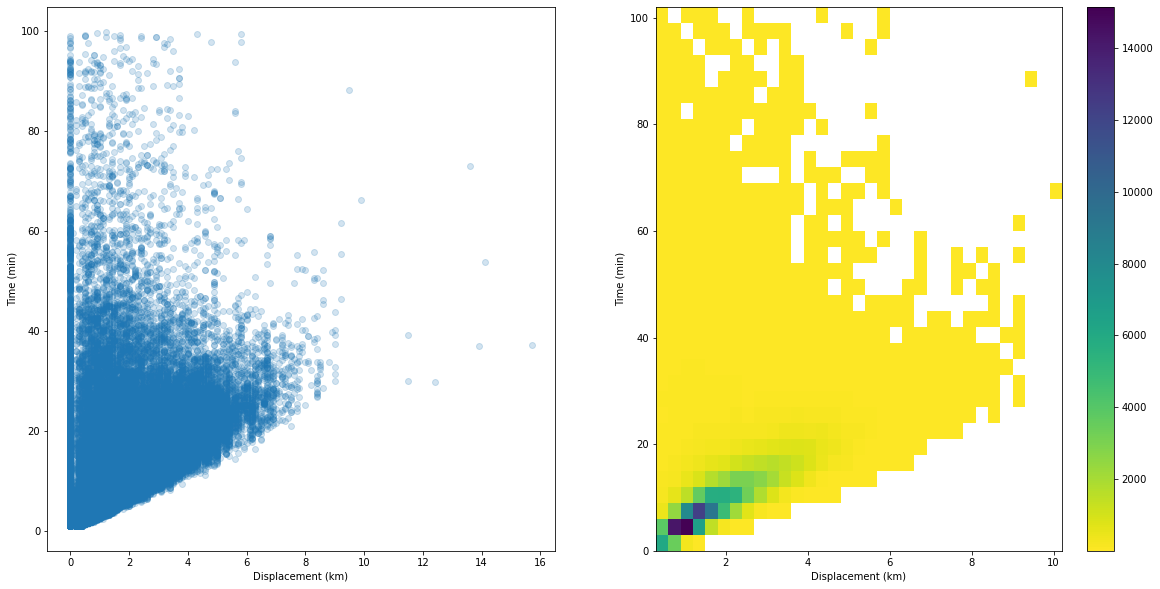

In [72]:
# bivariate plot of price vs. carat
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(data=duration_under_6k, x="displacement", y="duration_min",alpha=.2);
plt.xlabel('Displacement (km)')
plt.ylabel('Time (min)');

# Specify bin edges 
bins_x = np.arange(0.3, 10+0.3, 0.3)
bins_y = np.arange(0, 100+3, 3)

plt.subplot(1,2,2)
plt.hist2d(data = duration_under_6k, x = 'displacement', y = 'duration_min', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (km)')
plt.ylabel('Time (min)');


###### Observation
>There's a thick line on the 0 displacement mark, suggesting it took as long as 100 minutes to cover no displacement, definitely something wrong somewhere. The general trend shows that as the displacement increases the minimum amount of time required for a trip also increases.  
I also want to check for stations that have the same start and end_id's to see if they are related to 0 displacement trips.


In [73]:
print("The shape of the section of the data with 0 displacement trips is", duration_under_6k.query("displacement == 0").shape)

print("The shape of the section of the data with same start and end stations is",
      duration_under_6k.query("start_station_id == end_station_id").shape)

print("The shape of the section of the data with either 0 displacement trips or same start and end stations is",
      duration_under_6k[(duration_under_6k["displacement"]==0)|
                        (duration_under_6k["start_station_id"]==duration_under_6k["end_station_id"])].shape)

print("The shape of the section of the data with both 0 displacement trips and same start and end stations is",
      duration_under_6k[(duration_under_6k["displacement"]==0)&
                        (duration_under_6k["start_station_id"]==duration_under_6k["end_station_id"])].shape)

print("The shape of the section of the data with 0 displacement trips without same start and end station is",
      duration_under_6k[(duration_under_6k["displacement"]==0)&
    (duration_under_6k["start_station_id"]!=duration_under_6k["end_station_id"])].shape)

The shape of the section of the data with 0 displacement trips is (3337, 23)
The shape of the section of the data with same start and end stations is (3327, 23)
The shape of the section of the data with either 0 displacement trips or same start and end stations is (3337, 23)
The shape of the section of the data with both 0 displacement trips and same start and end stations is (3327, 23)
The shape of the section of the data with 0 displacement trips without same start and end station is (10, 23)


This suggests that all 3327 trips with the same start and end station id recorded 0 displacements, while there are 10 trips that have 0 displacements but have different, start and end station id. Let's pull those 10 records up just to see them.

In [74]:
duration_under_6k[(duration_under_6k["displacement"]==0)&
                        (duration_under_6k["start_station_id"]!=duration_under_6k["end_station_id"])]

,displacement,duration_sec,avg_vel,start_time_hms,start_date,start_hour,start_day,start_month,end_time_hms,end_date,...,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
15616,0.0,94,0.8,09:21:43.131000,2019-02-27,09,Wednesday,February,09:23:17.917000,2019-02-27,...,30,San Francisco Caltrain (Townsend St at 4th St),67,San Francisco Caltrain Station 2 (Townsend St...,5014,Subscriber,1979,Male,No,1.566667
61448,0.0,89,0.9,17:49:10.278000,2019-02-20,17,Wednesday,February,17:50:39.326000,2019-02-20,...,30,San Francisco Caltrain (Townsend St at 4th St),67,San Francisco Caltrain Station 2 (Townsend St...,5561,Subscriber,1981,Male,No,1.483333
62105,0.0,111,0.7,17:19:06.848000,2019-02-20,17,Wednesday,February,17:20:58.767000,2019-02-20,...,30,San Francisco Caltrain (Townsend St at 4th St),67,San Francisco Caltrain Station 2 (Townsend St...,5900,Subscriber,1979,Male,No,1.850000
73948,0.0,730,0.1,12:01:57.220000,2019-02-19,12,Tuesday,February,12:14:08.143000,2019-02-19,...,67,San Francisco Caltrain Station 2 (Townsend St...,30,San Francisco Caltrain (Townsend St at 4th St),3460,Customer,1988,Male,No,12.166667
74555,0.0,734,0.1,10:03:32.839000,2019-02-19,10,Tuesday,February,10:15:46.880000,2019-02-19,...,30,San Francisco Caltrain (Townsend St at 4th St),67,San Francisco Caltrain Station 2 (Townsend St...,4827,Subscriber,1988,Male,No,12.233333
76658,0.0,72,1.1,08:16:29.120000,2019-02-19,08,Tuesday,February,08:17:41.592000,2019-02-19,...,67,San Francisco Caltrain Station 2 (Townsend St...,30,San Francisco Caltrain (Townsend St at 4th St),689,Subscriber,1979,Male,No,1.200000
89564,0.0,1227,0.1,14:58:48.561000,2019-02-16,14,Saturday,February,15:19:16.292000,2019-02-16,...,67,San Francisco Caltrain Station 2 (Townsend St...,30,San Francisco Caltrain (Townsend St at 4th St),4824,Subscriber,1987,Male,No,20.450000
116049,0.0,105,0.8,08:17:00.432000,2019-02-12,08,Tuesday,February,08:18:45.472000,2019-02-12,...,67,San Francisco Caltrain Station 2 (Townsend St...,30,San Francisco Caltrain (Townsend St at 4th St),6551,Subscriber,1983,Male,No,1.750000
158941,0.0,107,0.7,18:35:17.425000,2019-02-05,18,Tuesday,February,18:37:04.670000,2019-02-05,...,30,San Francisco Caltrain (Townsend St at 4th St),67,San Francisco Caltrain Station 2 (Townsend St...,5459,Subscriber,1980,Male,No,1.783333
171514,0.0,853,0.1,20:05:50.541000,2019-02-03,20,Sunday,February,20:20:04.433000,2019-02-03,...,223,16th St Mission BART Station 2,108,16th St Mission BART,5048,Subscriber,1995,Female,No,14.216667


###### Quick Observation
One thing to spot is the 9/10 records being between station id 67 and 30. Also notice how they are the same place but different stations; _San Francisco Caltrain (Townsend St at 4th St)_ and _San Francisco Caltrain **Station 2** (Townsend St at 4th St)_, same with the last one from _16th St Mission BART **Station 2**_ to _16th St Mission BART_.  

A simple explanation could be because the displacement between the stations are so short the rounded up displacement isn't even up to 0.1km(100m).

### [Bivariate Exploration of Numerical and Categorical feature](#toc) <a id="bivex_numcatfeat"></a>

###### Question
>Let's look at the interactions between numerical and categorical variables.  
I want to look at how `displacement` and `duration_min` relate with `start_day` and `user_type`.

###### Visualizations

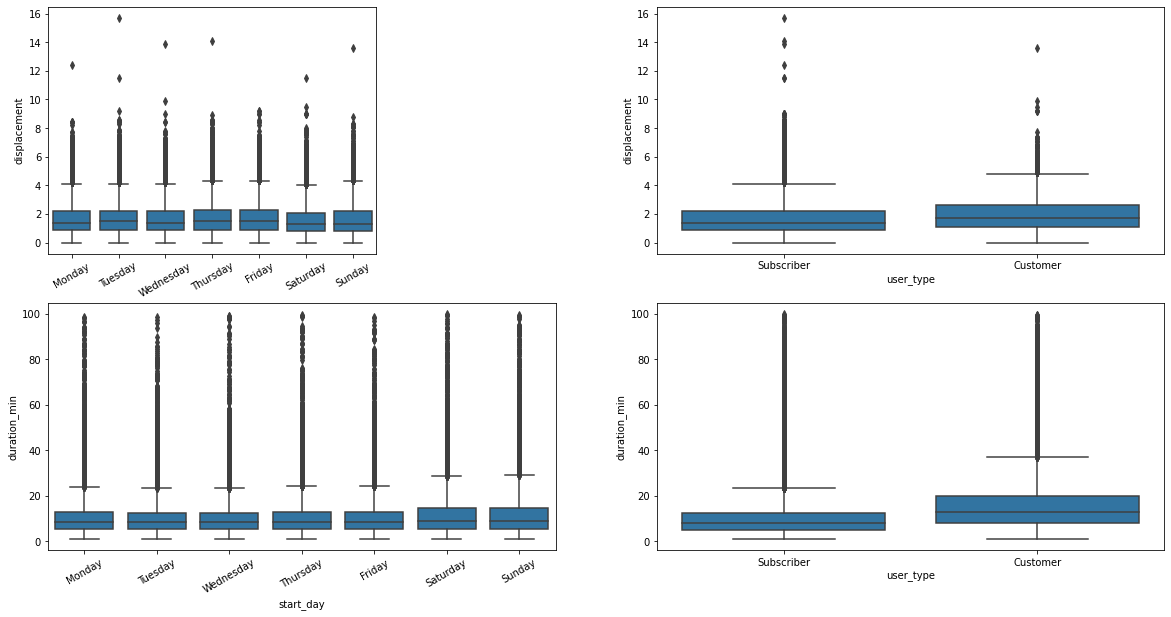

In [75]:
plt.figure(figsize=(20,10))

# bivariate plots of price vs. cut, color, clarity
plt.subplot(2,3,1)
sb.boxplot(data=duration_under_6k,x="start_day",y="displacement",color=default_color)
plt.xticks(rotation=30)

plt.subplot(2,2,2)
sb.boxplot(data=duration_under_6k,x="user_type",y="displacement",color=default_color)

plt.subplot(2,2,3)
sb.boxplot(data=duration_under_6k,x="start_day",y="duration_min",color=default_color)
plt.xticks(rotation=30)

plt.subplot(2,2,4)
sb.boxplot(data=duration_under_6k,x="user_type",y="duration_min",color=default_color);

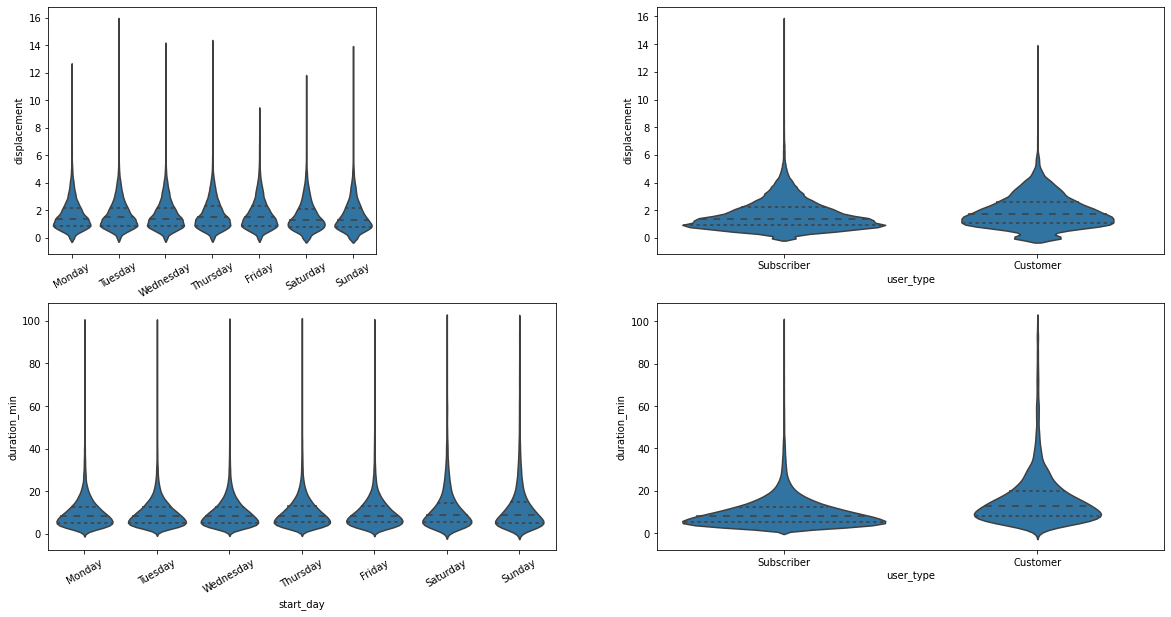

In [76]:
plt.figure(figsize=(20,10))

# bivariate plots of price vs. cut, color, clarity
plt.subplot(2,3,1)
sb.violinplot(data=duration_under_6k,x="start_day",y="displacement",color=default_color, inner="quartile")
plt.xticks(rotation=30)

plt.subplot(2,2,2)
sb.violinplot(data=duration_under_6k,x="user_type",y="displacement",color=default_color, inner="quartile")

plt.subplot(2,2,3)
sb.violinplot(data=duration_under_6k,x="start_day",y="duration_min",color=default_color, inner="quartile")
plt.xticks(rotation=30)

plt.subplot(2,2,4)
sb.violinplot(data=duration_under_6k,x="user_type",y="duration_min",color=default_color, inner="quartile");


###### Observations
>The plots suggests that on average customers have longer trips than subscribers. Also if you look closely at the box plots, you should see that trips have a higher average time on Saturdays and Sundays, however this trend isn't the same for the displacement feature.

###### Question
>What is the velocity distribution at different hours of the day?

###### Visualizations

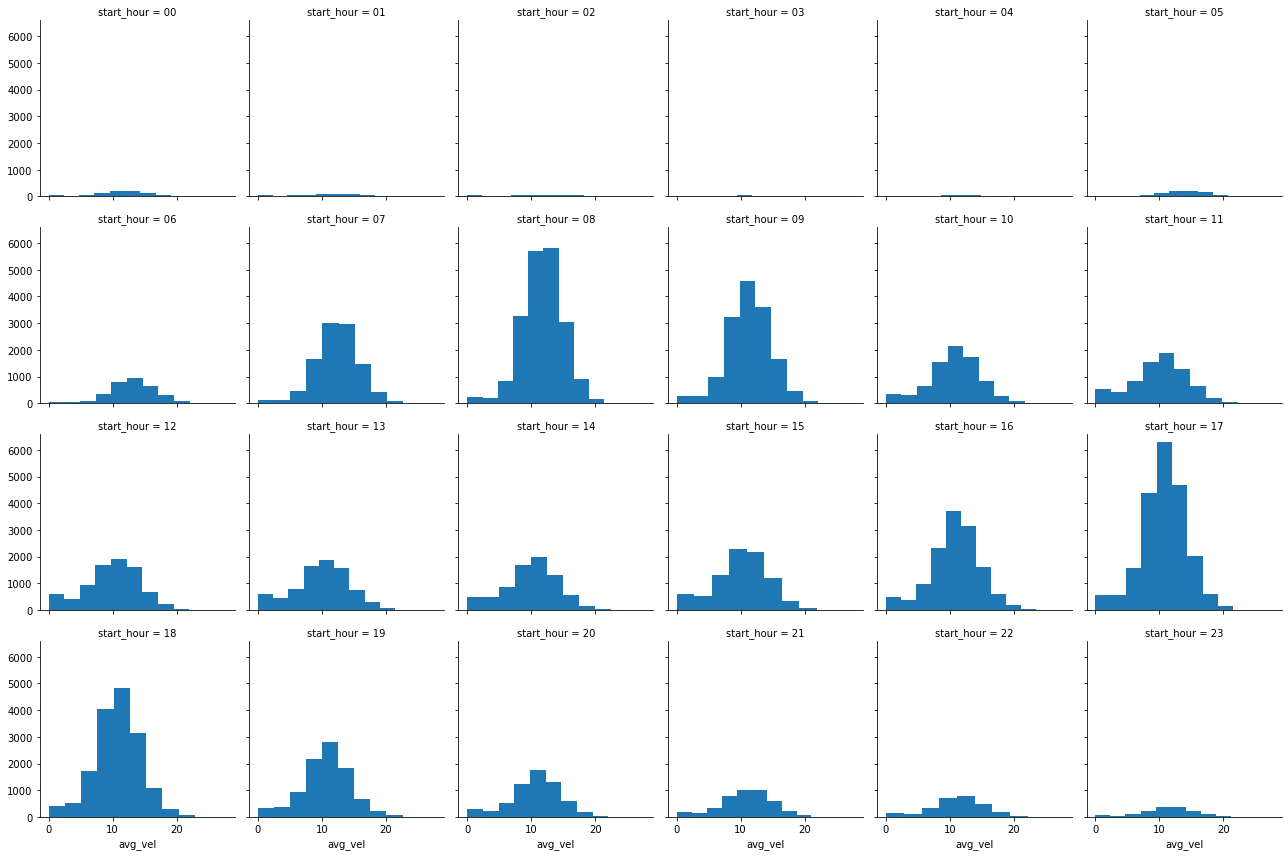

In [77]:
g = sb.FacetGrid(data=duration_under_6k, col="start_hour", sharey=True, sharex=True, col_wrap=6)
g.map(plt.hist,"avg_vel");

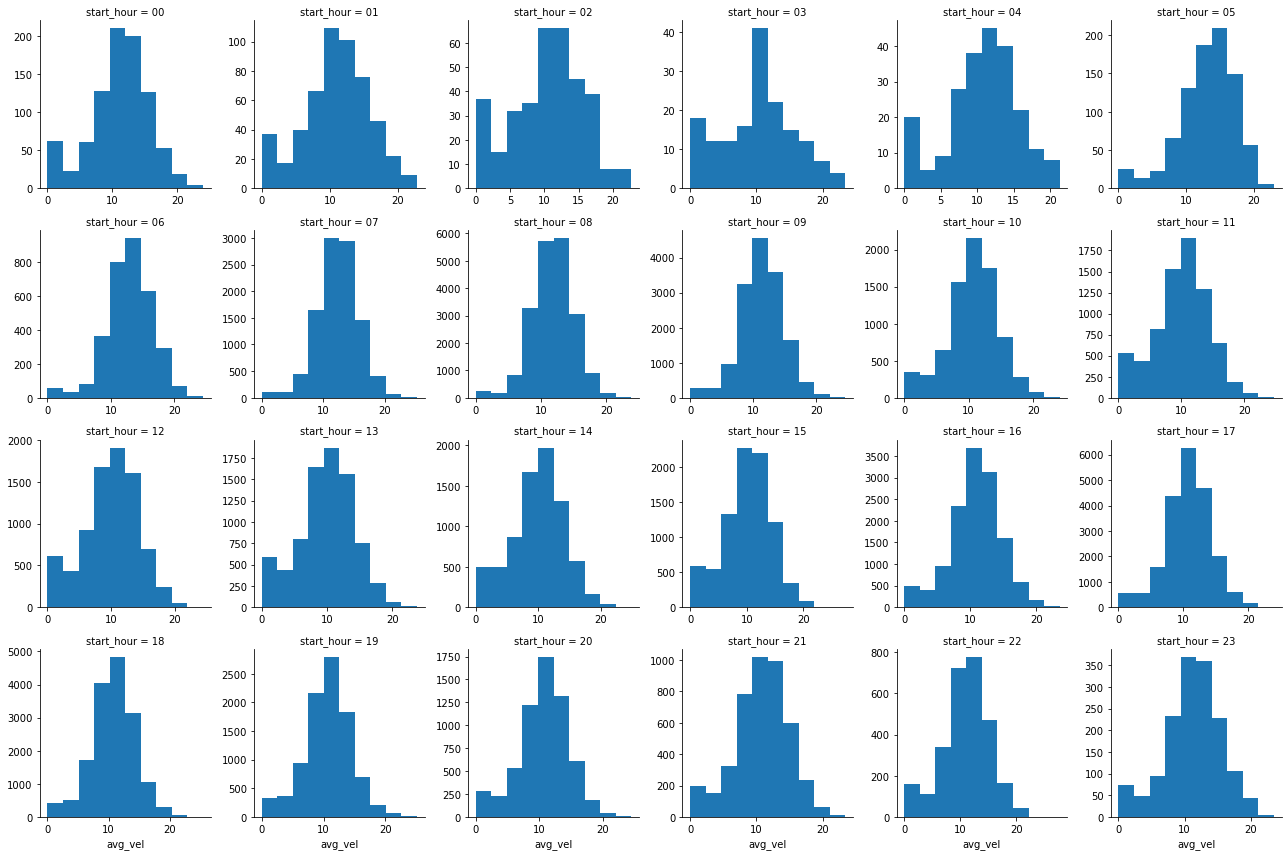

In [78]:
g = sb.FacetGrid(data=duration_under_6k, col="start_hour", sharey=False, sharex=False, col_wrap=6)
g.map(plt.hist,"avg_vel");

###### Observation
>There's not much to observe from this plot. We already know that at earlier hours of the day: before 6am, we have very few trips. I think the different values of the avg_vel are spread across the different hours of the day depending on the total number of trips recorded during that hour. No really fast or slow trips associated with a particular hour of the day.

###### Visualizations

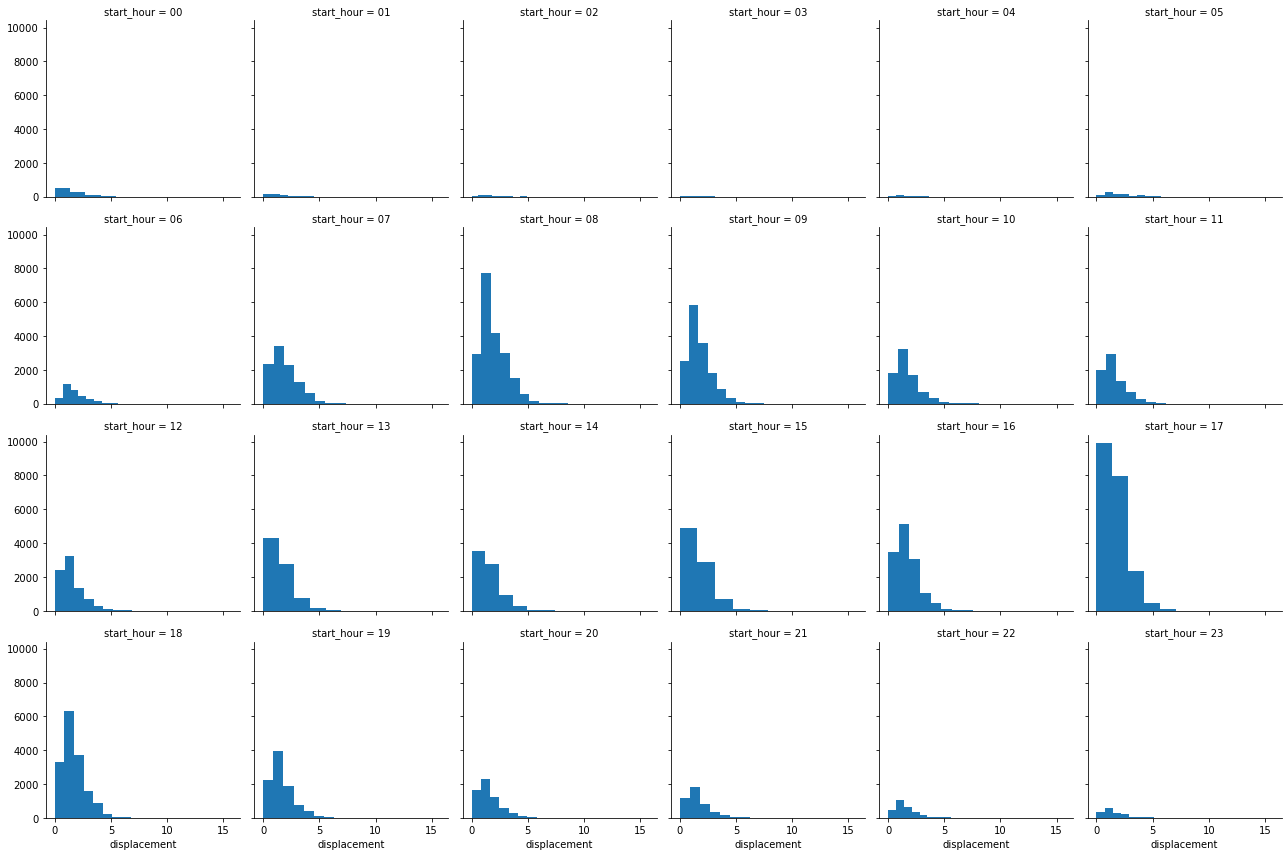

In [79]:
g = sb.FacetGrid(data=duration_under_6k, col="start_hour", sharey=True, sharex=True, col_wrap=6)
g.map(plt.hist,"displacement");

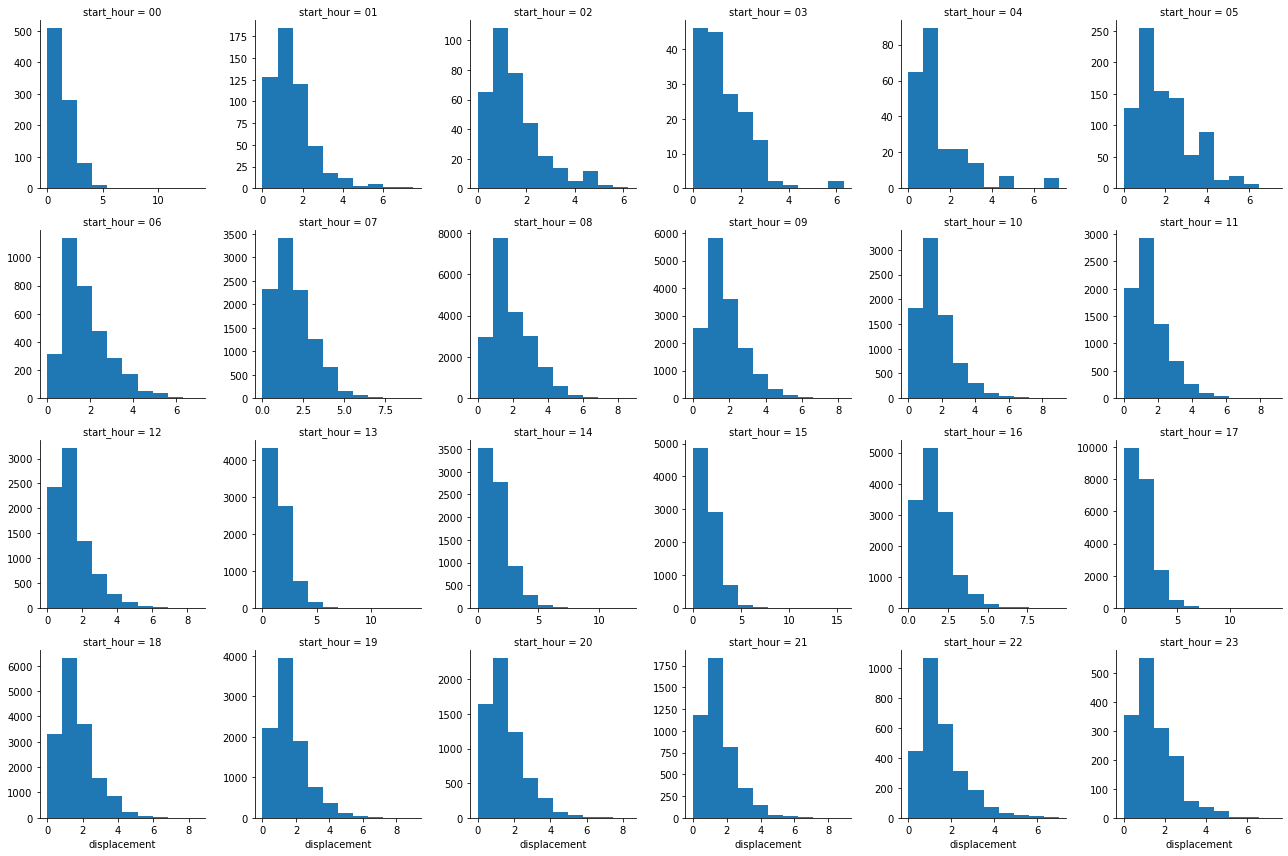

In [80]:
g = sb.FacetGrid(data=duration_under_6k, col="start_hour", sharey=False, sharex=False, col_wrap=6)
g.map(plt.hist,"displacement");

###### Observation
> From this plot I can see that the hours trips were longer than 10km are around midnight, 1pm, 2pm, 3pm and 5pm.

###### Question
>Are the distributions of time spent on trips for each hour is unique?

###### Visualizations

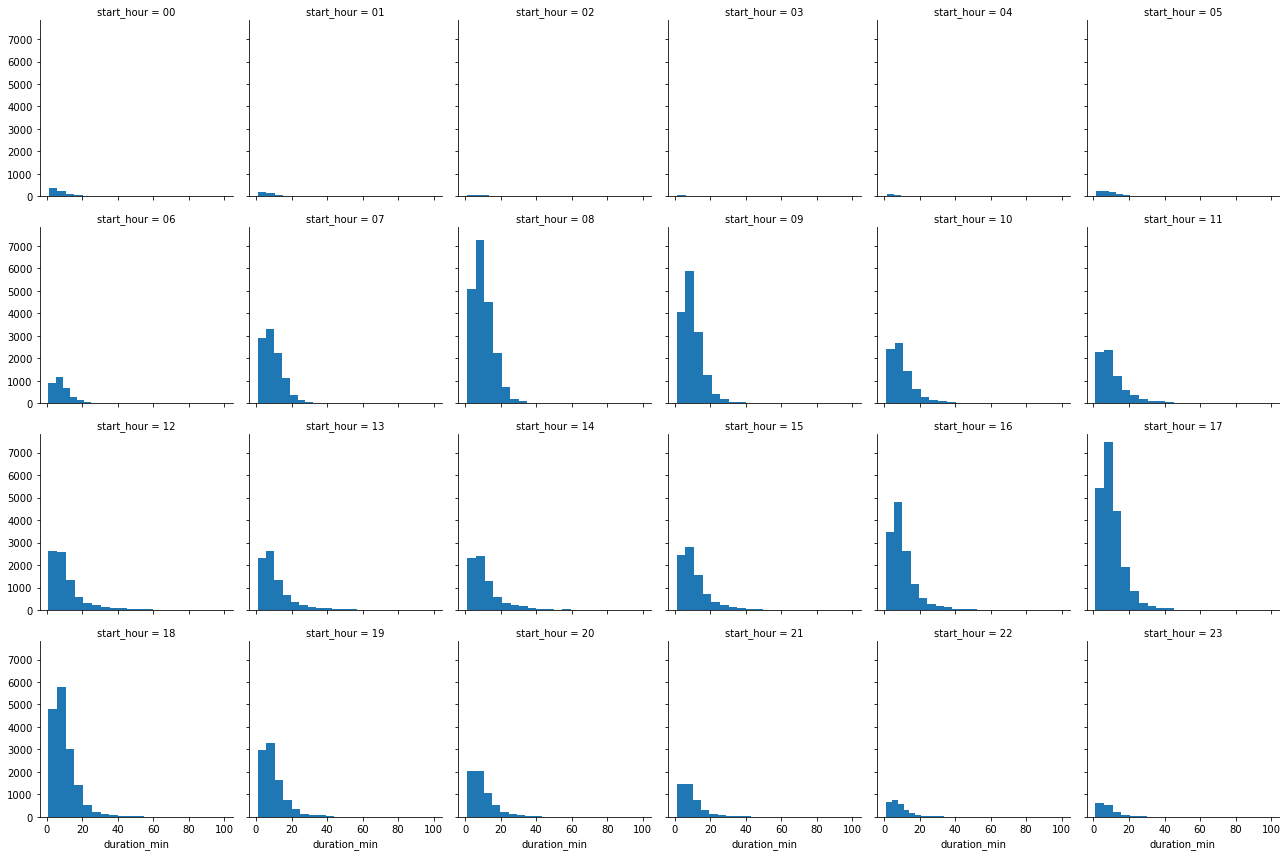

In [81]:
g=sb.FacetGrid(data=duration_under_6k, col="start_hour", col_wrap=6, sharex=True, sharey=True)
g.map(plt.hist,"duration_min",bins=20);

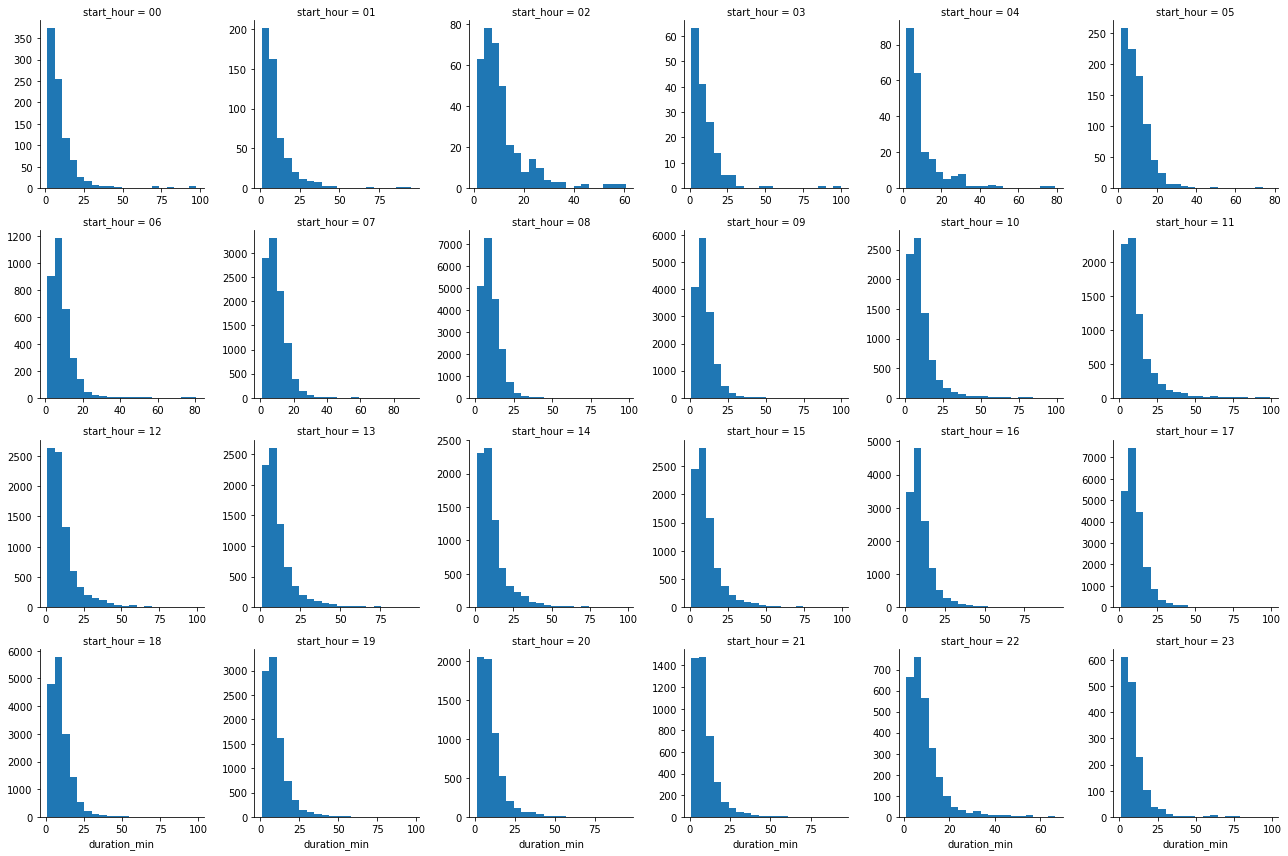

In [82]:
g=sb.FacetGrid(data=duration_under_6k, col="start_hour", col_wrap=6, sharex=False, sharey=False)
g.map(plt.hist,"duration_min",bins=20);

###### Observation
>Again no major uknown unique trend for the time spent on trips per start hour of the day.

### [Bivariate Exploration of Categorical Features](#toc) <a id="bivex_catfeat"></a>

###### Question
>How does `bike_share_for_all_trip` relates with `user_type`?

###### Visualizations

I want to create a function to help me draw heatmaps of 2 categorical varibles

In [83]:
def custom_heatmap(cat1,cat2,df=duration_under_6k):#set default df to duration_under_6k
    cat_cat = df.groupby([cat1,cat2]).size()#group df by the two categorical features of interest
    cat_cat_count = cat_cat.reset_index(name="count")#naming the columns with values "count"
    cat_cat_pivot = cat_cat_count.pivot(index=cat1,columns=cat2,values="count")#create pivot with counts per cat1 and cat2
    return sb.heatmap(cat_cat_pivot,annot=True,cmap="YlGnBu",fmt="g");#return an annotated heatmap

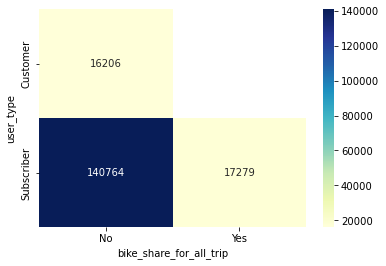

In [84]:
custom_heatmap("user_type","bike_share_for_all_trip");

No _Customer_ has a _Yes_ in `bike_share_for_all_trip` activated, is it a subscriber only feature?

###### Question
>I'll like to see the counts of `start_hour` for trips for the different `start_day`.

###### Visualizations

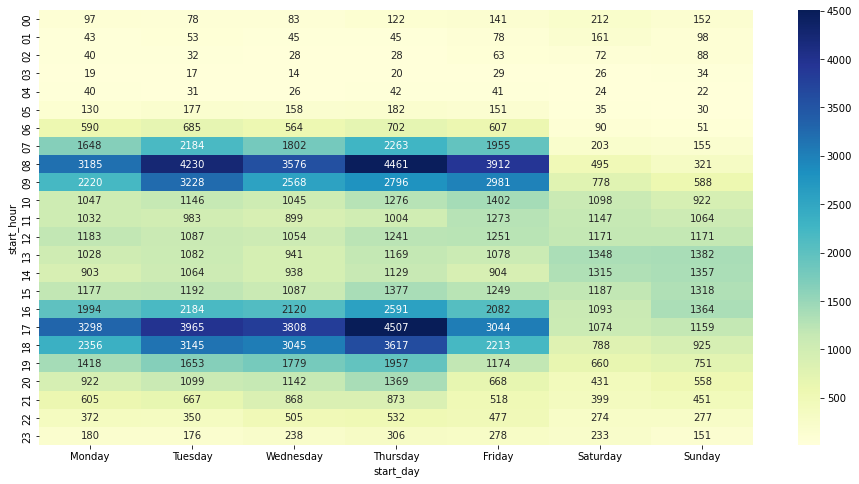

In [85]:
plt.figure(figsize=(16,8))
custom_heatmap("start_hour","start_day");

###### Observation
>From the plot I can see that 7am-9am and 4pm-6pm from Mondays to Fridays are busy periods for the gobikes in San Francisco. For Saturdays and Sundays the relative busy periods are between 10am and 5pm.

###### Question
>Now I'd like to look at the Top 10 start stations. How do hour and day of the week affect their number of rides?

###### Visualizations

In [86]:
# first I'll get all the names of the top 10 start stations with highest number of rides
top_10_start_station_list = [i for i in duration_under_6k["start_station_name"].value_counts()[:10].sort_values().index]

# then i create a a new df containing only these top 10 stations
top_10_start_station = duration_under_6k[duration_under_6k.start_station_name.isin(top_10_start_station_list)]

In [87]:
top_10_start_station_list

['Powell St BART Station (Market St at 5th St)',
 'Steuart St at Market St',
 'Howard St at Beale St',
 'San Francisco Ferry Building (Harry Bridges Plaza)',
 'San Francisco Caltrain (Townsend St at 4th St)',
 'Powell St BART Station (Market St at 4th St)',
 'Montgomery St BART Station (Market St at 2nd St)',
 'Berry St at 4th St',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'Market St at 10th St']

In [88]:
top_10_start_station.sample(20,random_state=22)

,displacement,duration_sec,avg_vel,start_time_hms,start_date,start_hour,start_day,start_month,end_time_hms,end_date,...,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
132723,0.4,1098,1.4,22:28:18.283000,2019-02-08,22,Friday,February,22:46:36.627000,2019-02-08,...,5,Powell St BART Station (Market St at 5th St),44,Civic Center/UN Plaza BART Station (Market St ...,4773,Subscriber,1988,Male,No,18.300000
156468,1.1,346,11.9,07:55:23.309000,2019-02-06,07,Wednesday,February,08:01:10.112000,2019-02-06,...,5,Powell St BART Station (Market St at 5th St),64,5th St at Brannan St,3035,Subscriber,1964,Male,No,5.766667
114903,1.0,314,11.5,09:08:23.462000,2019-02-12,09,Tuesday,February,09:13:38.364000,2019-02-12,...,81,Berry St at 4th St,104,4th St at 16th St,4826,Subscriber,1995,Female,No,5.233333
48171,1.4,1563,3.2,07:50:39.210000,2019-02-22,07,Friday,February,08:16:42.447000,2019-02-22,...,3,Powell St BART Station (Market St at 4th St),15,San Francisco Ferry Building (Harry Bridges Pl...,2558,Customer,1971,Male,No,26.050000
33566,1.8,2143,3.0,10:51:55.726000,2019-02-24,10,Sunday,February,11:27:39.040000,2019-02-24,...,5,Powell St BART Station (Market St at 5th St),15,San Francisco Ferry Building (Harry Bridges Pl...,2967,Customer,1980,Male,No,35.716667
9234,1.2,401,11.1,07:36:09.157000,2019-02-28,07,Thursday,February,07:42:50.764000,2019-02-28,...,22,Howard St at Beale St,66,3rd St at Townsend St,6320,Subscriber,1961,Male,No,6.683333
20215,0.9,322,9.6,13:44:11.007000,2019-02-26,13,Tuesday,February,13:49:33.388000,2019-02-26,...,5,Powell St BART Station (Market St at 5th St),61,Howard St at 8th St,4997,Subscriber,1986,Female,No,5.366667
55553,0.4,181,8.5,10:01:49.255000,2019-02-21,10,Thursday,February,10:04:51.096000,2019-02-21,...,5,Powell St BART Station (Market St at 5th St),44,Civic Center/UN Plaza BART Station (Market St ...,5966,Subscriber,1972,Male,Yes,3.016667
123773,2.4,623,13.7,09:01:20.963000,2019-02-11,09,Monday,February,09:11:44.902000,2019-02-11,...,81,Berry St at 4th St,110,17th & Folsom Street Park (17th St at Folsom St),5491,Subscriber,1985,Female,No,10.383333
55873,2.0,457,16.0,09:31:29.677000,2019-02-21,09,Thursday,February,09:39:07.029000,2019-02-21,...,81,Berry St at 4th St,16,Steuart St at Market St,4964,Customer,1984,Female,No,7.616667


In [89]:
top_10_start_station.to_csv("top_10_start_station.csv",index=False)

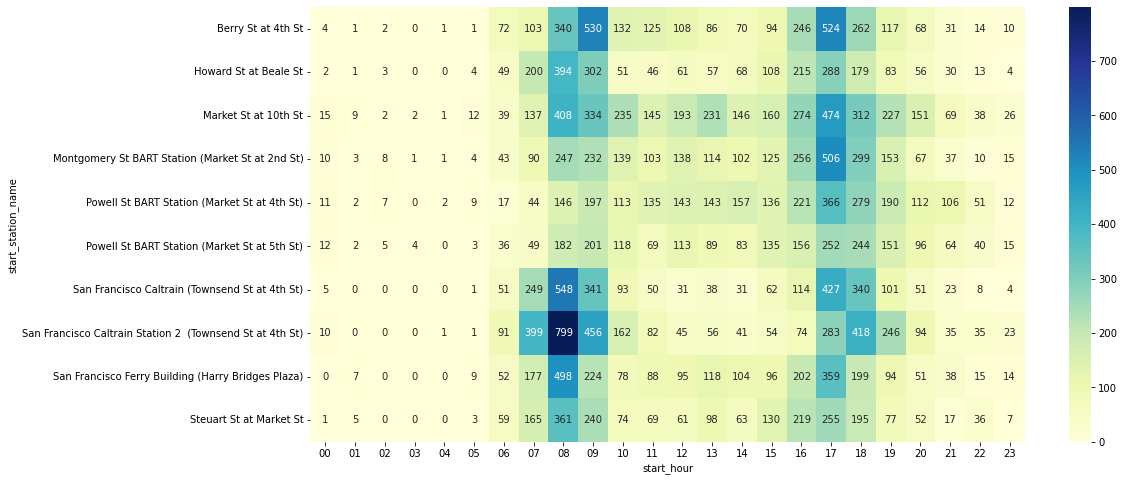

In [90]:
# call my custom_heatmap function and this time change the default df the required top_10_start_station
plt.figure(figsize=(16,8))
custom_heatmap("start_station_name","start_hour",df=top_10_start_station);

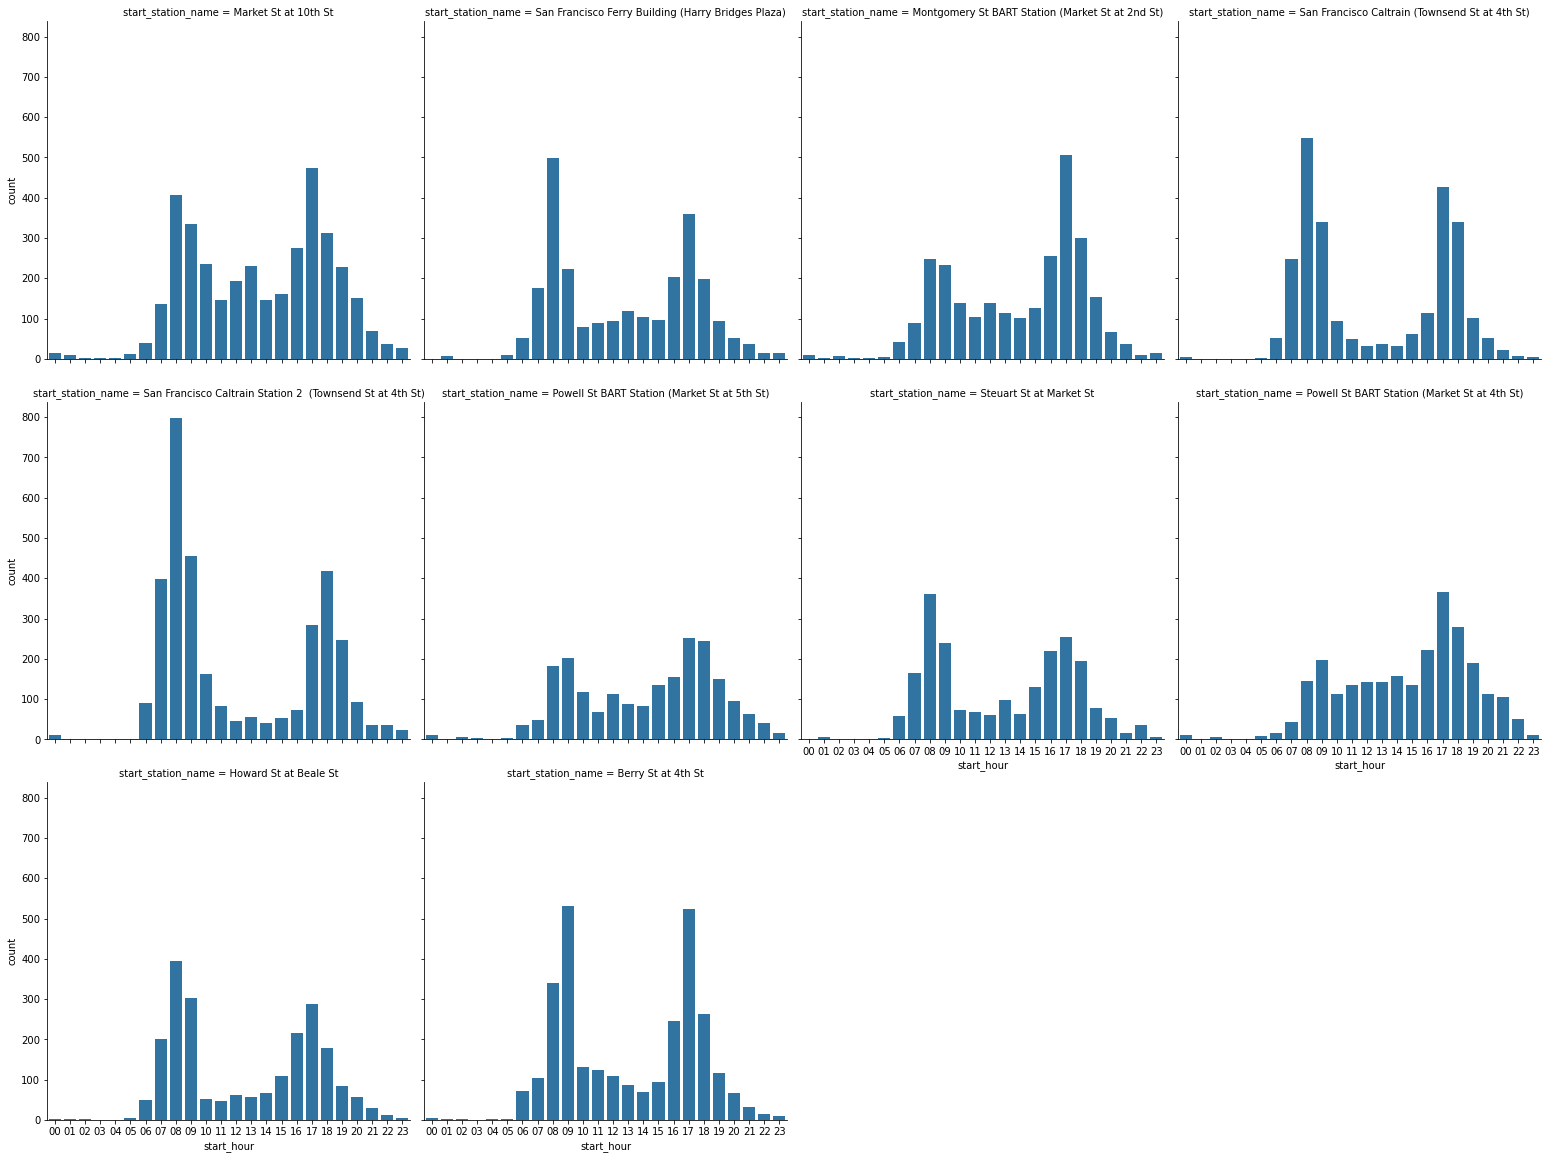

In [91]:
g = sb.FacetGrid(data=top_10_start_station, col="start_station_name", height=5.4,sharey=True, sharex=True, col_wrap=4)
g.map(sb.countplot,"start_hour");

###### Observation
>From the plot I can observe that **_San Francisco Caltrain Station 2 (Townsend St at 4th St)_** has its highest count between 7-9 am when many should be leaving for work. A thought that comes to mind is that the area might be mainly residential or the most residential of the top 10, having many people leave from there to other stations for work.  
On the other hand of all the top 10 stations the stations with high traffic at the close of work hours: 16-18 pm might be filled with business areas. Some examples include, **_Montgomery St BART Station (Market St at 2nd St)_**, **_Berry St at 4th St_**, and **_Market St at 10th St_**.


###### Visualization

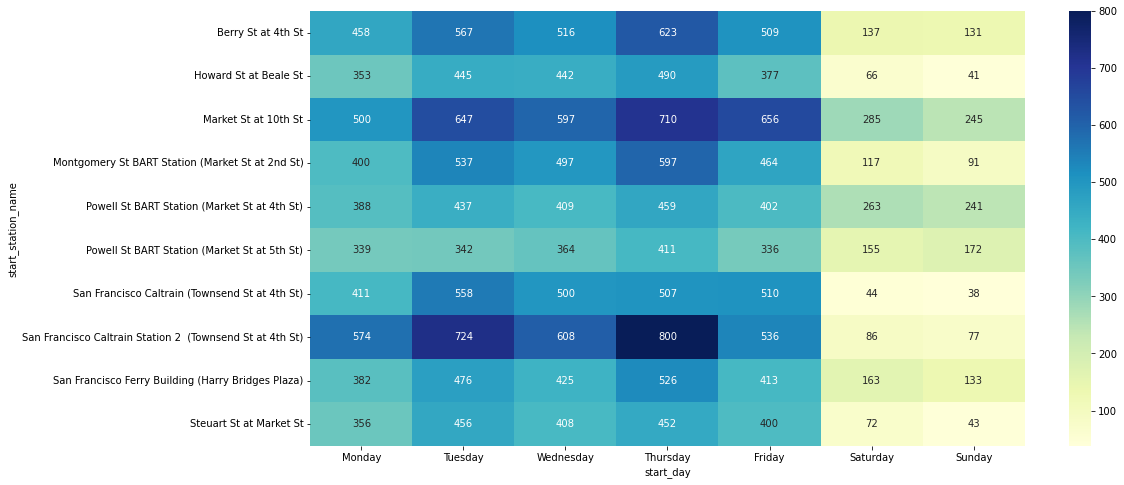

In [92]:
plt.figure(figsize=(16,8))
custom_heatmap("start_station_name","start_day",df=top_10_start_station);

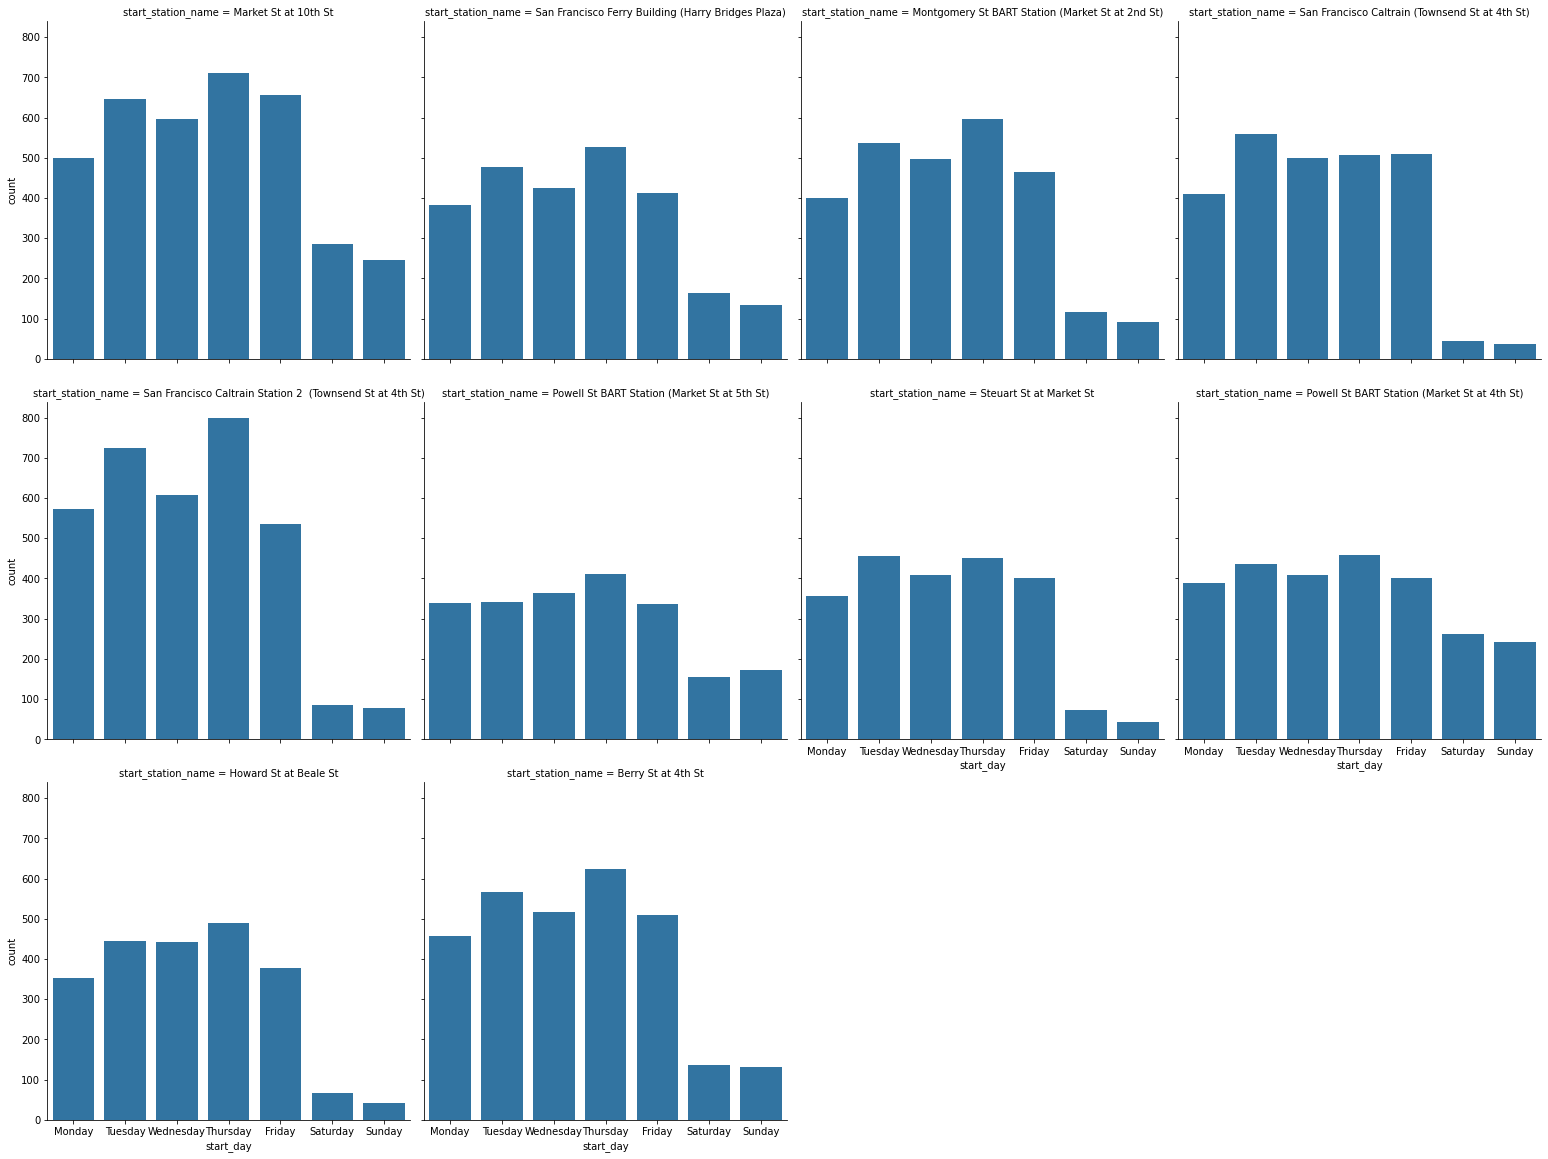

In [93]:
g = sb.FacetGrid(data=top_10_start_station, col="start_station_name", height=5.4,sharey=True, sharex=True, col_wrap=4)
g.map(sb.countplot,"start_day");

###### Observation
>Why do _**Market St at 10th St**_ and **_Powell St BART Station (Market St at 4th St)_** have the highest Saturday and Sunday counts?

<a id="bivex_conclusion"></a>
### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected there's a relationship between the time and displacement. If I had the actual _distance_ then I would probably have observed a more linear relationship. However, we see that as the distance increases the least possible value for time taken for the trip increases.
> From the boxplots, why does it seem like there's a longer average time taken on Saturday and Sunday trips. Do rides cover longer distances on those days? Or are the riders in less of a hurry.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From the heatmap on bike_share and user_type I noticed no customer has bike_share_for_all_trip activated. Is that due to the unavailability of that option for subscribers?

## [Multivariate Exploration](#toc) <a id="multivex"></a>

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

###### Question
>How does start_hour and start_day affect the distance and time numereical features?

###### Question
> How much do the displacement and duration vary per location?

###### Visualizations

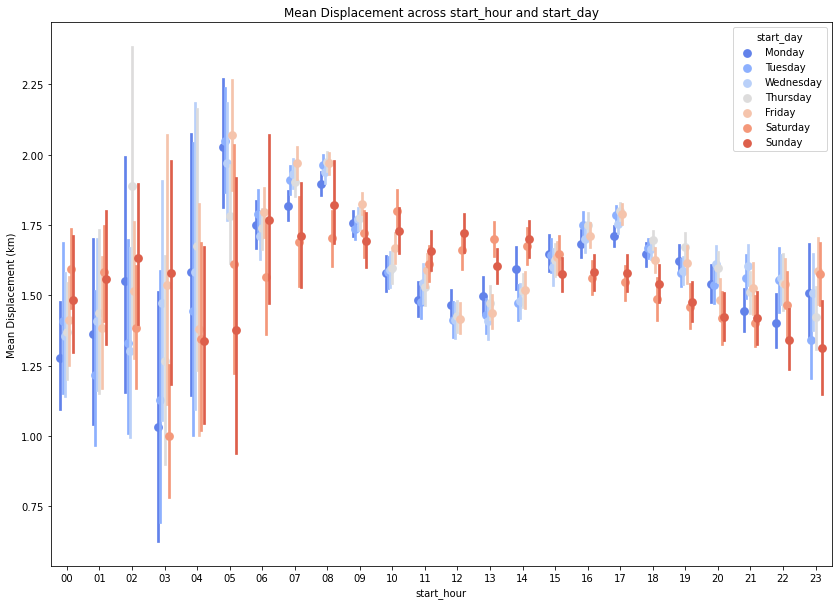

In [94]:
fig = plt.figure(figsize = [14,10])
ax = sb.pointplot(data = duration_under_6k, x = 'start_hour', y = 'displacement', hue = 'start_day',
           palette='coolwarm', linestyles = '', dodge = 0.4)
plt.title('Mean Displacement across start_hour and start_day')
plt.ylabel('Mean Displacement (km)')
plt.show();

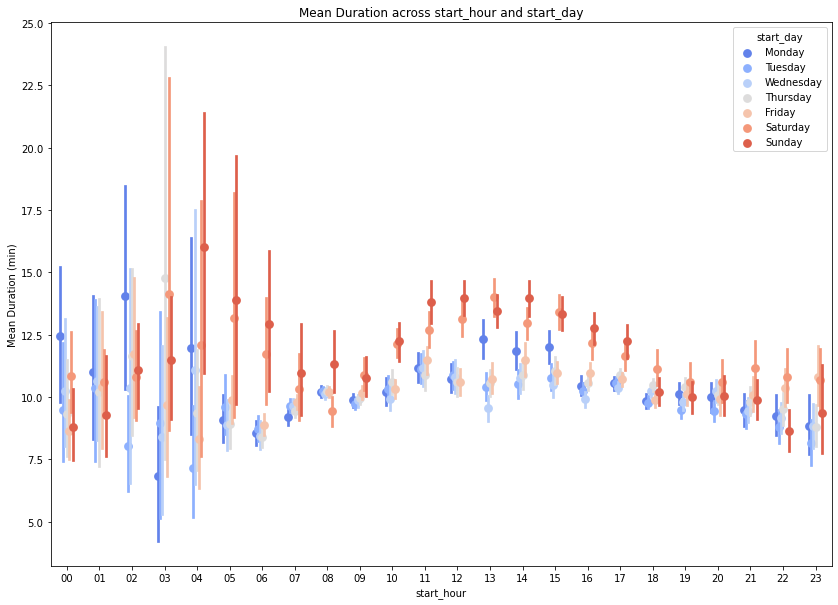

In [95]:
fig = plt.figure(figsize = [14,10])
ax = sb.pointplot(data = duration_under_6k, x = 'start_hour', y = 'duration_min', hue = 'start_day',
           palette='coolwarm', linestyles = '', dodge = 0.4)
plt.title('Mean Duration across start_hour and start_day')
plt.ylabel('Mean Duration (min)')
plt.show();

###### Observation
>For the most part of the plot's above we can group our days of the week into two; Mon-Fri and Sat-Sun. Each having a period when they are greater than the other in both the displacement and duration plots.


###### Visualizations

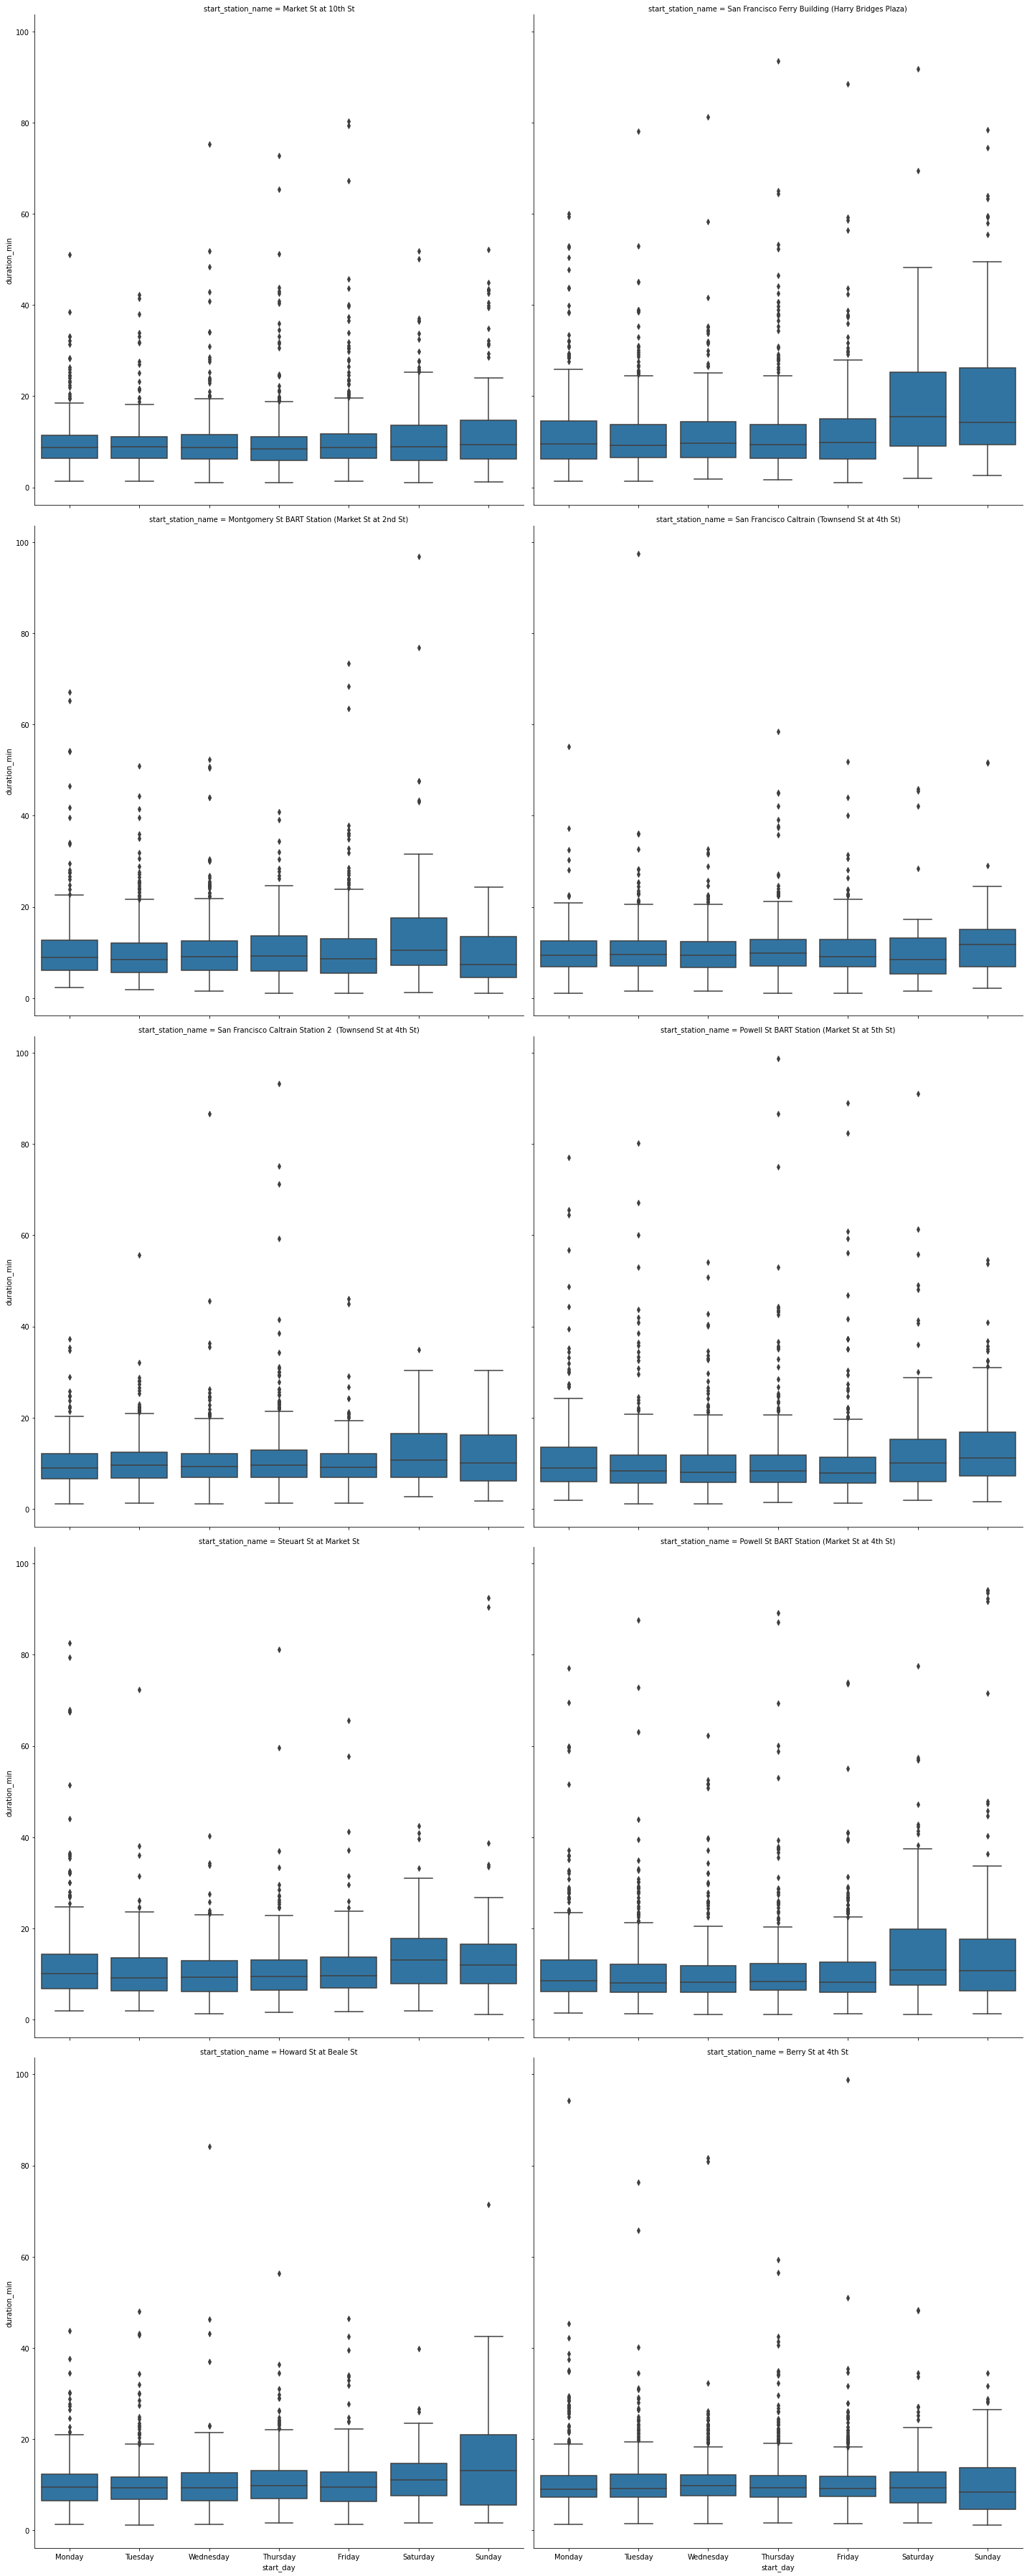

In [96]:
g = sb.FacetGrid(data = top_10_start_station, col = 'start_station_name', height = 10, col_wrap=2)
g.map(sb.boxplot, 'start_day', 'duration_min');

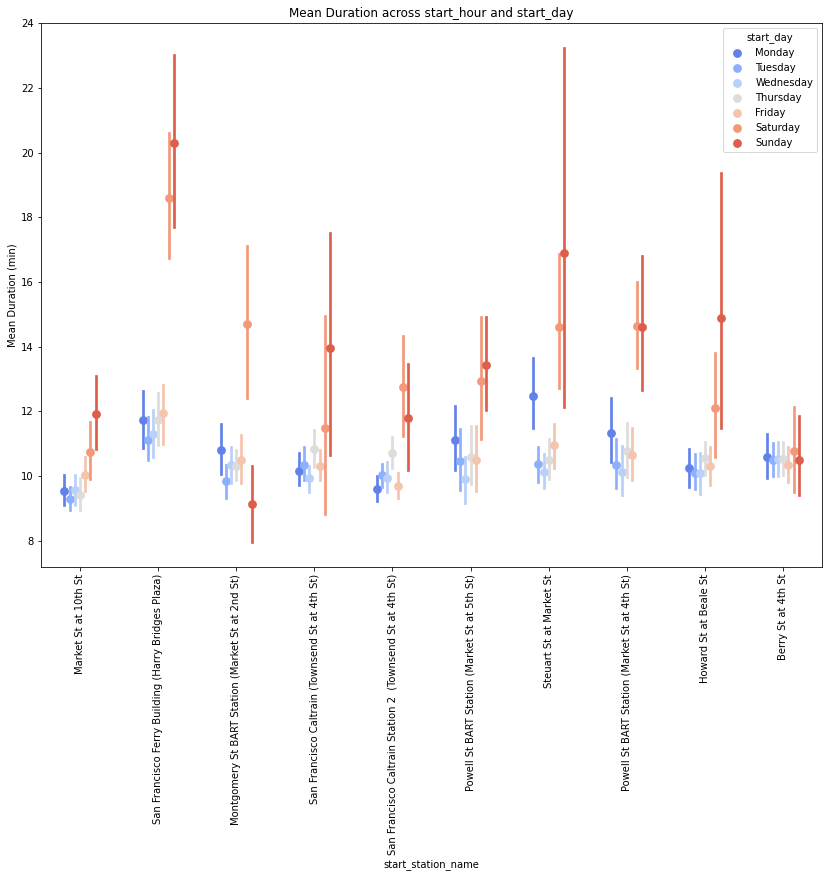

In [97]:
fig = plt.figure(figsize = (14,10))
ax = sb.pointplot(data = top_10_start_station, x = 'start_station_name', y = 'duration_min', hue = 'start_day',
           palette='coolwarm', linestyles = '', dodge = 0.4)
plt.xticks(rotation=90);
plt.title('Mean Duration across start_hour and start_day')
plt.ylabel('Mean Duration (min)')
plt.show();

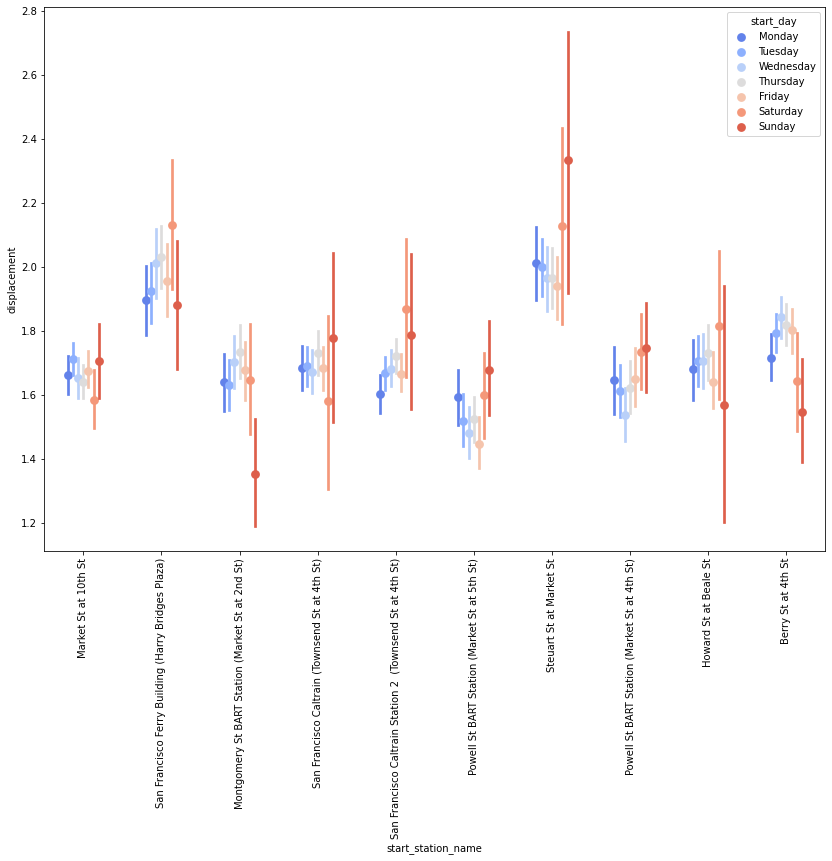

In [98]:
fig = plt.figure(figsize = [14,10])
ax = sb.pointplot(data = top_10_start_station, x = 'start_station_name', y = 'displacement', hue = 'start_day',
           palette='coolwarm', linestyles = '', dodge = 0.4)
plt.xticks(rotation=90);

###### Observations
>In these top 10 plots we see a trend that we've already established the Sat-Sun group having longer duration for trips, however, Sunday in _Montgomery St BART Station(Market St at 2nd St)_ has a different behaviour, from the duration plot I see that it has the shortest average duration of about 9 minutes among all the plots.

###### Visualizations

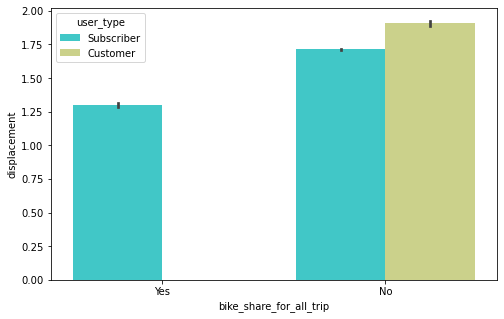

In [99]:
plt.figure(figsize=(8,5))
sb.barplot(x='bike_share_for_all_trip',y='displacement',data=duration_under_6k, palette='rainbow', hue='user_type');
# plt.title("Fare of Passenger by Embarked Town, Divided by Class")

###### Observations
>On average rides with **No** bike_share_for_all_trip have stations that are farther apart than those who have it _activated_.

<a id ="multivex_conclusion"></a>
### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> After observing the general trends of the days and hours with distance and durations in bivariate plots, looking at them more closely showed that the trends seen in the bivariate plot isn't true for all instances. For example Sundays generally have average longer trips but for early hours of the day that isn't the case.

### Were there any interesting or surprising interactions between features?

> There weren't any surprising interactions between features.

## [Conclusions](#toc) <a id="final_conclusions"></a>
>After creating and selecting the columns to use in my plots, treating outliers we've looked at general trends and seen how when we drill down to specific cases the trends begin to change. 

Some General Trends 

- Thusdays are the days with most rides even when we factor out the counts for our top 10 stations that trend holds for the most part.
- Trips take longer on Saturdays and Sundays.
- We can have a sense of busy hours of the day and why for example the periods between 7-9 am when people leave for work and 4-6 when they close from work.
- Sundays and Saturdays have less bike rides.
- For some reason no customer has a _Yes_ value for `bike_share_for_all_trip`.  

Some questions

- Why does Wednesday the 13-02-2019 have really less values?
- Why doesn't the Montgomery station follow the general trend of average longer trips on Sundays?
- What's the story behind 0 distance trips?



## [References](#toc)<a id="ref"></a>

[Heart Attack EDA by NAMAN MANCHANDA](https://www.kaggle.com/code/namanmanchanda/heart-attack-eda-prediction-90-accuracy)  
[Seaborn's Documentation on Choosing Color Palette](https://seaborn.pydata.org/tutorial/color_palettes.html)